In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
import requests
from bs4 import BeautifulSoup
import re
from cycler import cycler

In [2]:
my_url = "https://www.courtwatchnyc.org/"
raw_html = requests.get(my_url)
soup_doc = BeautifulSoup(raw_html.content, "html.parser")
print(soup_doc.prettify())

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:website="http://ogp.me/ns/website">
 <head>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- This is Squarespace. -->
  <!-- alyssa-aguilera-alzw -->
  <base href=""/>
  <meta charset="utf-8">
   <title>
    Court Watch NYC
   </title>
   <link href="https://static1.squarespace.com/static/5a21b2c1b1ffb67b3f4b2d16/t/5a641d8271c10be0a07b16a3/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="https://www.courtwatchnyc.org/" rel="canonical"/>
   <meta content="Court Watch NYC" property="og:site_name">
    <meta content="Last Week In Court" property="og:title"/>
    <meta content="https://www.courtwatchnyc.org/" property="og:url"/>
    <meta content="website" property="og:type"/>
    <meta

In [3]:
all_info = soup_doc.find_all('p')

[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
 <p>Criminalization of Poverty</p>,
 <p>Remand</p>,
 <p>Unreasonable Bail</p>,


In [47]:
journal_text = []

for strong_tag in all_info:
    first_text = strong_tag.text, strong_tag.next_sibling
    print(first_text)
journal_text.append(first_text)

('In just 1 shift in Manhattan court, Watchers observed 19 people go before the judge. Of those, four people had bail set, one person was remanded without the possibility of release on bail, seven people took guilty pleas, one was released to supervised release, and the remaining six were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. Each of those 19 people are now entangled in the criminal legal system in some way or another, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals.', <p>Criminalization of Poverty</p>)
('Criminalization of Poverty', <ul dir="ltr"><li>A young, 20 year old Latino man had spent nearly an entire day in police custody before he was brought before a judge on the charge of “aggressive solici

In [49]:
journal_text[]

IndexError: list index out of range

In [41]:
all_info2 = soup_doc.find_all('li')
all_info2

[<li class="page-collection">
 <a href="/about/">About</a>
 </li>, <li class="page-collection">
 <a href="/get-involved/">Get Involved</a>
 </li>, <li class="page-collection">
 <a href="/for-watchers/">For Watchers</a>
 </li>, <li class="blog-collection active-link">
 <a href="/">Last Week In Court</a>
 </li>, <li class="page-collection">
 <a href="/newsletters/">Newsletters</a>
 </li>, <li>A young, 20 year old Latino man had spent nearly an entire day in police custody before he was brought before a judge on the charge of “aggressive solicitation”--an “<strong>unclassified misdemeanor</strong>.” He was given an ACD, so he has to “stay out of trouble” for 6 months.<strong> Do the police and the courts take into consideration how difficult it is to “stay out of trouble” when you’re over-policed and experiencing poverty?</strong> The system reinforces laws that punish people in poverty for making others around them uncomfortable.</li>, <li>Watchers witnessed the judge <strong>remand a pe

In [44]:
journal_text2 = []

for li_tag in all_info2:
    first_text2 = li_tag.text, li_tag.next_sibling
    journal_text2.append(first_text2)

In [46]:
journal_text2

[('\nAbout\n', '\n'),
 ('\nGet Involved\n', '\n'),
 ('\nFor Watchers\n', '\n'),
 ('\nLast Week In Court\n', '\n'),
 ('\nNewsletters\n', '\n'),
 ('A young, 20 year old Latino man had spent nearly an entire day in police custody before he was brought before a judge on the charge of “aggressive solicitation”--an “unclassified misdemeanor.” He was given an ACD, so he has to “stay out of trouble” for 6 months. Do the police and the courts take into consideration how difficult it is to “stay out of trouble” when you’re over-policed and experiencing poverty? The system reinforces laws that punish people in poverty for making others around them uncomfortable.',
  None),
 ('Watchers witnessed the judge remand a person without the possibility for release, despite the public defender’s arguments that their client had strong community ties and a job to get back to. The attorney argued for some amount of bail so that their client could come back to court, but the judge refused and set the next cour

In [51]:
journals = []

journals.append(all_info)
journals

[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
  <p>Criminalization of Poverty</p>,
  <p>Remand</p>,
  <p>Unreasonable Bail</

In [52]:
journals.append(journal_text2)
journals

[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
  <p>Criminalization of Poverty</p>,
  <p>Remand</p>,
  <p>Unreasonable Bail</

# Second page

In [53]:

    
my_url = "https://www.courtwatchnyc.org/?offset=1529935832179"
raw_html = requests.get(my_url)
soup_doc = BeautifulSoup(raw_html.content, "html.parser")
print(soup_doc.prettify())

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:website="http://ogp.me/ns/website">
 <head>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- This is Squarespace. -->
  <!-- alyssa-aguilera-alzw -->
  <base href=""/>
  <meta charset="utf-8">
   <title>
    Court Watch NYC
   </title>
   <link href="https://static1.squarespace.com/static/5a21b2c1b1ffb67b3f4b2d16/t/5a641d8271c10be0a07b16a3/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="https://www.courtwatchnyc.org/" rel="canonical"/>
   <meta content="Court Watch NYC" property="og:site_name">
    <meta content="Last Week In Court" property="og:title"/>
    <meta content="https://www.courtwatchnyc.org/" property="og:url"/>
    <meta content="website" property="og:type"/>
    <meta

In [64]:
all_info3 = soup_doc.find_all('ul')


In [71]:
journal_text3=[]

for li_tag in all_info3:
    first_text3 = li_tag.text, li_tag.next_sibling
    print(first_text3)
    journal_text3.append(first_text3)

('\n\nAbout\n\n\nGet Involved\n\n\nFor Watchers\n\n\nLast Week In Court\n\n\nNewsletters\n\n', '\n')
('Numerical markers of injustice\xa0from this week:75% of cases seen this week were under 5 minutes.Over 90% of the accused were people of color.The official charges are often only mentioned in passing. In both Brooklyn and Manhattan, 50% of watchers were unable to record the penal law that was being discussed.Bail arguments most commonly employed by the prosecution:Prior arrests / convictions (60%)Severity of current charge (35%)Strength / weakness of evidence (30%)Bail arguments most commonly used by the defense:Ties to community (65%)Currently working / going to school (40%)Strength / weakness of evidence (30%)In all drug-related cases, most of which involved possession or tampering, an exorbitantly high bail was recommended by the prosecution at amounts of $10k, $15k, or even $25k. The prosecutor recommended a rehabilitation program only once.Multiple cases of petit larceny (shoplif

In [72]:
journals.append(journal_text3)

In [73]:
journals

[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
  <p>Criminalization of Poverty</p>,
  <p>Remand</p>,
  <p>Unreasonable Bail</

In [75]:
all_info4 = soup_doc.find_all('p')
all_info4

[<p><em>Manhattan Criminal Court, AR3<br/>Wednesday June 6, 2018 6-9pm</em></p>,
 <p>Before volunteering for Court Watch, I would have thought that someone distinguished enough to claim the title of “the people” -  someone with the power to request bail or even jail time - would be competent. But elected New York City prosecutors never fail to underwhelm, and my Court Watch stint during the night of June 6 was a case in point.</p>,
 <p>Arraignments at Manhattan Criminal Court are difficult to follow - the rapid pace, low volume, and background noise don’t help - but it was easy to spot the prosecutor's disorganization. He charged one of the night’s first defendants with stealing four packages of soap and body wash from a pharmacy. He requested bail (I didn’t catch the amount), but when the public defender and judge balked given the trivial charges, he was unable to provide justification. The judge set a jail alternative.</p>,
 <p>“The people” then charged a defendant with stealing $1,0

In [77]:
journal_text4=[]

for li_tag in all_info4:
    first_text4 = li_tag.text, li_tag.next_sibling
    print(first_text4)
    journal_text4.append(first_text4)

('Manhattan Criminal Court, AR3Wednesday June 6, 2018 6-9pm', <p>Before volunteering for Court Watch, I would have thought that someone distinguished enough to claim the title of “the people” -  someone with the power to request bail or even jail time - would be competent. But elected New York City prosecutors never fail to underwhelm, and my Court Watch stint during the night of June 6 was a case in point.</p>)
('Before volunteering for Court Watch, I would have thought that someone distinguished enough to claim the title of “the people” - \xa0someone with the power to request bail or even jail time - would be competent. But elected New York City prosecutors never fail to underwhelm, and my Court Watch stint during the night of June 6 was a case in point.', <p>Arraignments at Manhattan Criminal Court are difficult to follow - the rapid pace, low volume, and background noise don’t help - but it was easy to spot the prosecutor's disorganization. He charged one of the night’s first defen

In [78]:
journals.append(journal_text4)

In [79]:
journals

[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
  <p>Criminalization of Poverty</p>,
  <p>Remand</p>,
  <p>Unreasonable Bail</

# Third page

In [206]:
my_url = "https://www.courtwatchnyc.org/?offset=1526915700580"
raw_html = requests.get(my_url)
soup_doc = BeautifulSoup(raw_html.content, "html.parser")
print(soup_doc.prettify())

<!DOCTYPE doctype html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:website="http://ogp.me/ns/website">
 <head>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- This is Squarespace. -->
  <!-- alyssa-aguilera-alzw -->
  <base href=""/>
  <meta charset="utf-8">
   <title>
    Court Watch NYC
   </title>
   <link href="https://static1.squarespace.com/static/5a21b2c1b1ffb67b3f4b2d16/t/5a641d8271c10be0a07b16a3/favicon.ico" rel="shortcut icon" type="image/x-icon"/>
   <link href="https://www.courtwatchnyc.org/" rel="canonical"/>
   <meta content="Court Watch NYC" property="og:site_name">
    <meta content="Last Week In Court" property="og:title"/>
    <meta content="https://www.courtwatchnyc.org/" property="og:url"/>
    <meta content="website" property="og:type"/>
    <meta

In [208]:
all_info5 = soup_doc.find_all('ul')
all_info5

[<ul>
 <li class="page-collection">
 <a href="/about/">About</a>
 </li>
 <li class="page-collection">
 <a href="/get-involved/">Get Involved</a>
 </li>
 <li class="page-collection">
 <a href="/for-watchers/">For Watchers</a>
 </li>
 <li class="blog-collection active-link">
 <a href="/">Last Week In Court</a>
 </li>
 <li class="page-collection">
 <a href="/newsletters/">Newsletters</a>
 </li>
 </ul>,
 <ul dir="ltr"><li><strong>As seen previous weeks, exorbitant bails requested by DA are often reduced by the judge.</strong> In over half the cases we observed where the ADA recommended bail, the judge released the defendant on ROR. When the judge did set bail it was less than the amount that the ADA had requested. Some examples seen last week:<ul dir="ltr"><li>$75,000 requested, judge set at $30,000 bond/$15,000 cash: “Audience members reacted audibly to $75,000 bail, court officer said “we don’t need that.”</li><li>$25,000 requested, judge set at $5,000 bond/$2,500 cash (x3)</li><li>$25,0

In [209]:
journal_text5=[]

for li_tag in all_info5:
    first_text5 = li_tag.text, li_tag.next_sibling
    print(first_text5)
    journal_text5.append(first_text5)

('\n\nAbout\n\n\nGet Involved\n\n\nFor Watchers\n\n\nLast Week In Court\n\n\nNewsletters\n\n', '\n')
('As seen previous weeks, exorbitant bails requested by DA are often reduced by the judge. In over half the cases we observed where the ADA recommended bail, the judge released the defendant on ROR. When the judge did set bail it was less than the amount that the ADA had requested. Some examples seen last week:$75,000 requested, judge set at $30,000 bond/$15,000 cash: “Audience members reacted audibly to $75,000 bail, court officer said “we don’t need that.”$25,000 requested, judge set at $5,000 bond/$2,500 cash (x3)$25,000 requested, judge set at $2,000$15,000 bail requested by ADA, judge released on ROR$10,000 to $5,000 bond/$2,500 cash$10,000 requested, judge ROR’d$7,500 requested, judge ROR’d$7,500 to $3,000 (x2)$2,500 requested, judge ROR’dADA more likely to recommend bail for black defendants charged of assault. Over the past month, ADA’s recommended bail for less than half of whi

In [210]:
all_info6 = soup_doc.find_all('p')
all_info6

[<p><em>Manhattan Criminal Court<br/>DATs Monday March 19, 2018 </em><em>10-1pm</em></p>,
 <p>As I sat with my two fellow watchers for my first shift, I couldn't shake my nerves. I was only there to record data, what was I so nervous about?  <strong>But I was acutely aware that little details we were capturing could mean big shifts for the people standing in front of us</strong>. Was I going to see someone ripped away from their family? Was I going to see bail set at an exorbitant rate that the defendant couldn't afford? Was anyone not leaving that courtroom? Thankfully the answer was "no". At least for Monday.</p>,
 <p><strong>All in all, we saw about 50 DAT's during the shift.</strong> There were a ton of vehicle/traffic violations, and almost all pleaded down to a "509" and dismissed. The marijuana cases were all given MACD's, and there was only one instance where bail was requested for a DUI/Assault charge, but the Judge ROR'd the defendant. The defendant had recently been in a com

In [211]:
journal_text6=[]

for li_tag in all_info6:
    first_text6 = li_tag.text, li_tag.next_sibling
    print(first_text6)
    journal_text6.append(first_text6)

('Manhattan Criminal CourtDATs Monday March 19, 2018 10-1pm', <p>As I sat with my two fellow watchers for my first shift, I couldn't shake my nerves. I was only there to record data, what was I so nervous about?  <strong>But I was acutely aware that little details we were capturing could mean big shifts for the people standing in front of us</strong>. Was I going to see someone ripped away from their family? Was I going to see bail set at an exorbitant rate that the defendant couldn't afford? Was anyone not leaving that courtroom? Thankfully the answer was "no". At least for Monday.</p>)
('As I sat with my two fellow watchers for my first shift, I couldn\'t shake my nerves. I was only there to record data, what was I so nervous about? \xa0But I was acutely aware that little details we were capturing could mean big shifts for the people standing in front of us. Was I going to see someone ripped away from their family? Was I going to see bail set at an exorbitant rate that the defendant 

In [212]:
journals.append(journal_text5)

In [213]:
journals.append(journal_text6)

In [214]:
journals

[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty, enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
  <p>Criminalization of Poverty</p>,
  <p>Remand</p>,
  <p>Unreasonable Bail</

In [184]:
journals_simple = '''[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty , enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,
  <p>Criminalization of poverty </p>,
  <p>Remand</p>,
  <p>Unreasonable Bail</p>,
  <p>Coerced pleas</p>,
  <p dir="ltr"><em>Manhattan Criminal Court AR3<br/>July 20, 2018</em></p>,
  <p>During our shift, we most noticed how <strong>court-employed people exerted their power over court-confined people</strong>, or people there not by choice. Something as small as an officer returning to court from the store with a plastic bag full of cookies seemed like a demonstration of authority over those people confined to the bench. Near the end of our shift the court went into recess for 90 minutes without explanation to the families in the audience, but for whatever reason an officer confided in us outside that there was “an issue” with one of the cells in the back.</p>,
  <p>At one point, <strong>a person was pushed into the court in a restraint chair, with his whole body restricted and tied up into the chair</strong>. He was noncommunicative as the judge explained that he could not be arraigned until he consented to be fingerprinted. The judge said aloud that she understood he had been rotating between jail and jail hospitals for a long time, and that, without an arraignment, he would be returned to jail. We sat there, horrified, as he was pushed back out of the room with nothing having been resolved -- leading us to dwell on our potential for direct action. <strong>In that moment, what role did our watching serve?</strong></p>,
  <p>This raised even larger questions about how arbitrary the system is, and how the people with decision-making authority cooperate with this nonsense. In one fleeting exception, an interpreter reprimanded the prosecutor for speaking too quickly. <strong>For many many cases, the prosecutor would read off statements as reported by the police, leaving us wondering about how all of these criminalizing institutions bleed and blend into each other.</strong> “It’s only weed, man.”</p>,
  <p>Throughout my Court Watch shifts, the most consistent trend that I have noticed is a <strong> disregard for the confusion , frustration , and anxiety experienced by those who are waiting for their loved ones to be arraigned</strong>. People routinely wait for hours with very little information, and there seems to be a complete lack of empathy for how stress ful that experience can be.</p>,
  <p>Last week, my shift started at 6:00p; it wasn’t until 7:30p that the judge returned to the courtroom and arraignments resumed, and it was never clear why there was such a long break or when the judge would return (and arraignments only resumed until 8:30p, when an hour long recess was called). During this long period of uncertainty , one of the court officers brusquely told a woman in the audience to put her phone away; this woman commented to her companion that at no point was this rule relayed to her and there were no signs stating this rule in the courtroom. Another woman approached the public defenders’ area multiple times to ask for updates on her son--she was sternly told by an officer not to approach. I have seen this situation play out several times before. <strong>Not only is there a lack of transparency in this process, but when people actively try to seek out information, they are scolded</strong>. Typically, one of the public defenders will then try to help whoever approached. In this case, after the second time this woman asked if her son’s paperwork had been processed, she was told that he was in the other courtroom. She then rushed out of the room, clearly exasperated  .</p>,
  <p><strong>In addition to the lack of transparency during these waiting periods, the arraignments themselves are difficult to follow</strong>. It is frequently hard to hear what the judge, ADA, and defense are saying, due to a lack of enunciation and amplification. The audience is ordered not to speak during arraignments, yet officers will have conversations with others in the audience, making it that much tougher to hear the proceedings. In addition, the amount of acronyms, law codes, and jargon add to the challenge of parsing what is happening. It is a frustration experience for me, and I am only there to listen and record--I cannot imagine the stress felt by the defendants and their loved ones (not to mention the added confusion when a language barrier exists).</p>,
  <p>For those who work in the justice system, an arraignment is a familiar routine--mundane and uneventful. However, they need to understand the anxiety that comes with waiting for a loved one to be arraigned and how difficult it is for the average citizen to understand the entirety of the proceedings. <strong>There needs to be more transparency in the process, a willingness to share information, and empathy for those who are going through this experience.</strong></p>,
  <p>I have worked three Court Watch shifts so far, and in two of those shifts <strong>I have seen children sent to jail</strong>. The first was a 17-year-old accused of shooting a man in the hip in front of the public housing complex where he lived. The victim didn't pick the child's photo out of a lineup, but the kid was wearing the same color t-shirt as the shooter — red — and the undercover officers who were in the vicinity of the shooting seemed convinced that he had done it, even though he had no prior criminal record.</p>,
  <p>The second, during my most recent shift last Sunday, was a 16-year-old accused of tucking a firearm with an extended magazine into his waistband. The assistant DA claimed the gun was loaded, but they couldn't say how many bullets were in it. It was unclear to me how the police discovered the weapon in the first place.</p>,
  <p><strong>Both of these kids were active high-school students</strong>. Both had family members present in court, willing to vouch for their character and do whatever they could to keep their children out of jail. Both, it probably doesn't need to be said, were boys of color. And both had bail set at $2,000 cash, $4,000 bond — very likely more than their families could afford.</p>,
  <p>About a week after my most recent Court Watch shift, I attended a march protesting the Trump administration's policy of separating families at the border. I chanted, along with thousands of others, "Donald Trump, we're full of rage! No child in a cage!" It occurred to me for that all the outrage that has been expressed over the family separation policy in recent weeks, many people don't give much thought to the fact that <strong>America has been putting children in cages since long before Trump was elected, and that we still do, as a regular occurrence, right here in New York City. </strong></p>,
  <p>The boys I saw arraigned were sent to wait in cages while their parents scrambled to try to make bail. In the best-case scenario, the parents would have been able to pull together $2,000 after a few days, or put themselves at the mercy of a bail bondsman, and their son would have been released to fight the charges from a position of freedom. But even then, the child would have missed at least a few days of school. He would have been separated from his family without knowing when he would be able to see them again. And he would have been subjected to terrifying and degrading conditions that no human being, let alone a teenager, should have to experience. <strong>Even a few nights in jail are potentially enough to traumatize a child for the rest of his life.</strong></p>,
  <p>I think about all the dumb things I did and said when I was 16 and 17, and how lucky I was not to live in a community victimized by overpolicing.<strong> I think about what a scandal it would have been if I or one of my middle-class, white peers had been sent to jail</strong> indefinitely for a crime that we had been accused of based solely on the testimony of an undercover cop. <strong>And I think about how the assistant district attorneys and judges I saw during my Court Watch sessions seemed totally comfortable sending these two children behind bars indefinitely, as though it was just another day at the office.</strong></p>,
  <p><em>Brooklyn Criminal Court <br/>Night Court 6-9pm</em></p>,
  <p><strong>Each time I court watch, I am struck by how the tone set by court police can go a long way in further dehumanizing the accused and their families</strong>. When an arraignment is under way, the main purpose of the present court police seems to be enforcing the rules and decorum of the court room. The rules I see most frequently enforced include no cell phone use, no talking on the benches, and for the accused, no turning around to look at family. These rules may seem simple enough  to follow and enforce, but in my time with court watch, I’ve seen how these simples rules do not account for the needs and understandable instincts of the accused and their families, and can be enforced in unnecessarily aggressive and adversarial ways.</p>,
  <p>For example, I usually court watch during the night shift, 6-9 PM in Brooklyn, and there are often families sitting on the benches next to me — mothers with young children who wait sometimes hours for their loved ones to appear before the judge. The room is nearly always over-air conditioned and the children get antsy and cold and distracted. Yet, their presence in the room will become crucial when their loved one’s defense points to them during the arraignment and says, “he has ties to the community. In fact, his family is here tonight.” Oftentimes while the adults in the families are waiting for this moment to come, they’re managing a difficult situation — they don’t know when their loved one will appear; the kids get tired and hungry ; the stress of not knowing what will happen to the accused is of course enormous (I’ve seen families cry with relief at RORs); perhaps they’ve taken time off of work to attend the arraignment and they’re trying to negotiate how much longer they can stay at court, etc. It seems totally understandable to me, given these circumstances, when someone forgets to silence their cell phone, or takes it out to glance at it, or when someone starts to whisper encouraging things to a child, or to another adult, the two of them trying to figure out, for example, where the judge has disappeared to for the last half hour, or when their loved one will appear, or what the prosecutor is mumbling during the arraignment.</p>,
  <p>It also seems completely understandable when an accused forgets they’re supposed to be looking at the judge and glances back at their family. Last week, I witnessed a young transgender woman (who was misgendered by the defense, prosecutor and judge) look back with what appeared to be surprise and joy when the defense said “his mother is here in the courtroom to support him.” The young woman had tears in her eyes when she turned around instinctively to look for her mother on the benches.</p>,
  <p>In both this specific case of the young woman and in many instances of what I described before, when whole families await the arraignment of a loved one, <strong>I have seen court officers meet these small infractions of the court house rules with unneeded aggression</strong>. In the case of the young woman, a court officer immediately barked “TURN AROUND. FACE THE JUDGE.” He was 2 feet away from the young woman, and could have used a much different tone to indicate that he understood why she was turning around, but that she had to follow the rules. Instead, he was treating her as if she were already a criminal, and in this moment, was further breaking the law by turning around to glance at her mother. At another point last week, the judge disappeared for about an hour and a half, and during that time, one mother, with two small children and another woman who appeared to be her sister, began to become stress . She had a limited amount of time she could stay at the courthouse and none of the officers would tell her where the judge went or for how long she would be away. At one point the woman took out her cell phone briefly to check something and spotting her from across the room, a court officer strode towards her, pointing and shouting “PUT THAT AWAY.” <strong>His demeanor was such that her kid hid his face in her armpit. </strong></p>,
  <p><strong>Court officers encounter people in times of acute stress </strong>. I have seen many of them navigate this reality thoughtfully and compassionately, giving people gentle reminders to put away their cell phones, or taking long moments to explain something to a family member on a bench. I have also seen them yell, use harsh language, and lose their tempers in a matter of seconds. In any case, <strong>their actions and demeanors are crucial to setting the tone of the court room, and it should be imperative that, if they do wield this huge responsibility, they use their authority to reduce the trauma of the situation for all involved, as much as possible.</strong></p>,
  <p class="text-align-center">Contact Us: info@courtwatchnyc.org</p>],
 [('\nAbout\n', '\n'),
  ('\nGet Involved\n', '\n'),
  ('\nFor Watchers\n', '\n'),
  ('\nLast Week In Court\n', '\n'),
  ('\nNewsletters\n', '\n'),
  ('A young, 20 year old Latino man had spent nearly an entire day in police custody before he was brought before a judge on the charge of “aggressive solicitation”--an “unclassified misdemeanor.” He was given an ACD, so he has to “stay out of trouble” for 6 months. Do the police and the courts take into consideration how difficult it is to “stay out of trouble” when you’re over-policed and experiencing poverty ? The system reinforces laws that punish people in poverty for making others around them uncomfortable.',
   None),
  ('Watchers witnessed the judge remand a person without the possibility for release, despite the public defender’s arguments that their client had strong community ties and a job to get back to. The attorney argued for some amount of bail so that their client could come back to court, but the judge refused and set the next court date for two weeks away.',
   <li>The charge was not a misdemeanor or a felony but a <strong>“fugitive from justice” charge</strong> from an alleged instance four years in the past. The attorney argued that their client was in pretrial services, had given up their passport, and was undergoing “probation before he was ever convicted,” showing just how punitive the system is pretrial.</li>),
  ('The charge was not a misdemeanor or a felony but a “fugitive from justice” charge from an alleged instance four years in the past. The attorney argued that their client was in pretrial services, had given up their passport, and was undergoing “probation before he was ever convicted,” showing just how punitive the system is pretrial.',
   None),
  ('In one case, Watchers witnessed the DA ask for $200,000 bail. The public defender said 200k was not “reasonable” and asked the judge for a reasonable amount. In NY, judges are required to consider a person’s ability to pay bail. The attorney said that the client’s family might be able to pay 20-30k but not 200k. The judge ignored the attorney’s repeated requests for “reasonable” bail and set $75,000.',
   <li>In another case, <strong>the prosecution asked for $15,000 bail for a young Black 18-year-old with no criminal record</strong>. The attorney explained that he was staying in a shelter, in a job training program and that bail was not appropriate. <strong>The judge set $7,500 bond/$5,000 bail without giving any rationale for the decision.</strong></li>),
  ('In another case, the prosecution asked for $15,000 bail for a young Black 18-year-old with no criminal record. The attorney explained that he was staying in a shelter, in a job training program and that bail was not appropriate. The judge set $7,500 bond/$5,000 bail without giving any rationale for the decision.',
   <li>In yet another case, a man staying in a shelter, in a drug treatment program, and caring for his ailing wife was sent to Rikers on bail. <strong>The DA asked for 10k bail and the judge set 5k bail, without any explanation</strong>.</li>),
  ('In yet another case, a man staying in a shelter, in a drug treatment program, and caring for his ailing wife was sent to Rikers on bail. The DA asked for 10k bail and the judge set 5k bail, without any explanation.',
   <li>The average bail amount requested by the DA was $30,250, with a median of $7,500.</li>),
  ('The average bail amount requested by the DA was $30,250, with a median of $7,500.',
   None),
  ('The watchers witnessed the power of punitive DA sentencing requests. On a petit larceny charge, the prosecution requested a plea to the top charge and 6 months of jail time. Though the judge was more “lenient” in offering a “conditional discharge” (the accused has to complete a drug program), the punishment for failing to complete the program is still 6 months in jail. The DA was asking for bail, so the person had every incentive to take the offer the judge made.',
   None),
  ('DemographicsDefendants are disproportionately men of color: nearly 90% of defendants were male, and over 75% were Black or Latinx.Nearly one third of defendants were under 25 years old.The defense lawyers representing them, however, were almost 80% white, and the cases were determined by exclusively white judges. The prosecution was similarly over 90% white. In one case, a Watcher noted the prosecutor even had “trouble pronouncing the complainant and defense’s names.” \xa0Some younger defendants benefitted from opportunities to request conditions that resulted in minimal interference with jobs or internships. However, multiple cases involving younger defendants were arraigned in less than five minutes, leaving very little time for defendants to communicate these conditions to their defense attorneys.',
   <li>Atmosphere of Courtroom<ul dir="ltr"><li>The environment of the courtroom and the speed at which the cases are decided (<strong>over 50% of the cases were decided in under 5 minutes</strong>) continue to create confusion for both Watchers and the accused/their families. In one case, a Watcher noted “the family had to ask public defenders who were talking in the front row to be quiet because she couldn’t hear.” In a drug case being observed, there was no discussion of the nature of the incident, such as whether it was possession and in what capacity or how the officer was involved.</li><li>Watchers are consistently unable to gather critical information about the cases, either due to the nature of the courtroom or the lack of discussion in the arguments. Often, the ADA’s name, the relevant penal law, or even the charges themselves were absent or mentioned so briefly Watchers could not record them, <strong>illustrating the minimal attention these cases are given by the courts</strong>.</li><li><strong>The nature of the courtroom remains dehumanizing to defendants</strong> and limits their capacity to advocate for themselves. In a case requiring an ASL interpreter for the defendant, a Watcher wrote that it seemed “very cruel to handcuff someone who needs their hands to communicate.”<ul><li>Information revealing defendants’ individual personal circumstances — for example, needs related to childcare or school commitments — came out in some cases, particularly when arraignments ran a bit longer (5 minutes or more). <strong>In cases that were arraigned in around 2 minutes, however, court watchers were left wondering what information the judge was lacking when considering bail</strong>, or what additional relevant details defense attorneys may have been able to glean from their defendants if allowed more time.</li></ul></li><li>There is also considerable confusion in the charges themselves. <strong>At least three cases were incorrectly classified, and in one case, the charges did not even match the complainant’s statement</strong>. Watchers also observed disagreements about whether a case should be held in family court or whether a defendant is eligible for ACD.</li></ul></li>),
  ('Defendants are disproportionately men of color: nearly 90% of defendants were male, and over 75% were Black or Latinx.',
   <li>Nearly one third of defendants were <strong>under 25 years old</strong>.</li>),
  ('Nearly one third of defendants were under 25 years old.',
   <li>The defense lawyers representing them, however, were almost <strong>80% white</strong>, and the cases were determined by <strong>exclusively white judges</strong>. The <strong>prosecution was similarly over 90% white</strong>. In one case, a Watcher noted the prosecutor even had “trouble pronouncing the complainant and defense’s names.”  </li>),
  ('The defense lawyers representing them, however, were almost 80% white, and the cases were determined by exclusively white judges. The prosecution was similarly over 90% white. In one case, a Watcher noted the prosecutor even had “trouble pronouncing the complainant and defense’s names.” \xa0',
   <li>Some younger defendants benefitted from opportunities to request conditions that resulted in minimal interference with jobs or internships. However, multiple cases involving younger defendants were <strong>arraigned in less than five minutes</strong>, leaving very little time for defendants to communicate these conditions to their defense attorneys.</li>),
  ('Some younger defendants benefitted from opportunities to request conditions that resulted in minimal interference with jobs or internships. However, multiple cases involving younger defendants were arraigned in less than five minutes, leaving very little time for defendants to communicate these conditions to their defense attorneys.',
   None),
  ('Atmosphere of CourtroomThe environment of the courtroom and the speed at which the cases are decided (over 50% of the cases were decided in under 5 minutes) continue to create confusion for both Watchers and the accused/their families. In one case, a Watcher noted “the family had to ask public defenders who were talking in the front row to be quiet because she couldn’t hear.” In a drug case being observed, there was no discussion of the nature of the incident, such as whether it was possession and in what capacity or how the officer was involved.Watchers are consistently unable to gather critical information about the cases, either due to the nature of the courtroom or the lack of discussion in the arguments. Often, the ADA’s name, the relevant penal law, or even the charges themselves were absent or mentioned so briefly Watchers could not record them, illustrating the minimal attention these cases are given by the courts.The nature of the courtroom remains dehumanizing to defendants and limits their capacity to advocate for themselves. In a case requiring an ASL interpreter for the defendant, a Watcher wrote that it seemed “very cruel to handcuff someone who needs their hands to communicate.”Information revealing defendants’ individual personal circumstances — for example, needs related to childcare or school commitments — came out in some cases, particularly when arraignments ran a bit longer (5 minutes or more). In cases that were arraigned in around 2 minutes, however, court watchers were left wondering what information the judge was lacking when considering bail, or what additional relevant details defense attorneys may have been able to glean from their defendants if allowed more time.There is also considerable confusion in the charges themselves. At least three cases were incorrectly classified, and in one case, the charges did not even match the complainant’s statement. Watchers also observed disagreements about whether a case should be held in family court or whether a defendant is eligible for ACD.',
   <li>Bail and fees<ul><li><strong>Surcharges were imposed even on poverty -driven crimes</strong>, such as shoplifting. At least one case of violation-level petit larceny for shoplifting included a $120 surcharge, a fee that seems counterproductive both for addressing the root cause of shoplifting and for preventing further alleged offenses. In another case, a defendant argued they were unable to pay a $75 surcharge and needed time to collect the money.</li><li>Bail was set in amounts from $200 to $25,000 with an average of $2,500. <strong>However, the prosecution continues to request extremely high bail, with an average of over $12,600</strong>. <strong>Judges ruled in favor of ADA’s recommendation of bail or RoR in 83% of observed cases</strong>, though the amount of bail was frequently reduced (to still sizable amounts).</li><li>In one case of an 18 year old boy pleading self-defense, the judge lowered bail from the $25,000 the prosecution requested to $2,000 so that the defendant would not have to go to Rikers Island, although $2,000 is still considerable.</li><li><strong>Flight risk was only mentioned by prosecution in less than half of the arguments for bail and the most common argument for bail to be set was the current charge’s seriousness</strong>. Defense attorneys used arguments of community ties and school/work obligation in over half of all arguments for lower bail or RoR.</li><li>Inability to pay bail was mentioned only once by a defense attorney in their bail argument.</li></ul></li>),
  ('The environment of the courtroom and the speed at which the cases are decided (over 50% of the cases were decided in under 5 minutes) continue to create confusion for both Watchers and the accused/their families. In one case, a Watcher noted “the family had to ask public defenders who were talking in the front row to be quiet because she couldn’t hear.” In a drug case being observed, there was no discussion of the nature of the incident, such as whether it was possession and in what capacity or how the officer was involved.',
   <li>Watchers are consistently unable to gather critical information about the cases, either due to the nature of the courtroom or the lack of discussion in the arguments. Often, the ADA’s name, the relevant penal law, or even the charges themselves were absent or mentioned so briefly Watchers could not record them, <strong>illustrating the minimal attention these cases are given by the courts</strong>.</li>),
  ('Watchers are consistently unable to gather critical information about the cases, either due to the nature of the courtroom or the lack of discussion in the arguments. Often, the ADA’s name, the relevant penal law, or even the charges themselves were absent or mentioned so briefly Watchers could not record them, illustrating the minimal attention these cases are given by the courts.',
   <li><strong>The nature of the courtroom remains dehumanizing to defendants</strong> and limits their capacity to advocate for themselves. In a case requiring an ASL interpreter for the defendant, a Watcher wrote that it seemed “very cruel to handcuff someone who needs their hands to communicate.”<ul><li>Information revealing defendants’ individual personal circumstances — for example, needs related to childcare or school commitments — came out in some cases, particularly when arraignments ran a bit longer (5 minutes or more). <strong>In cases that were arraigned in around 2 minutes, however, court watchers were left wondering what information the judge was lacking when considering bail</strong>, or what additional relevant details defense attorneys may have been able to glean from their defendants if allowed more time.</li></ul></li>),
  ('The nature of the courtroom remains dehumanizing to defendants and limits their capacity to advocate for themselves. In a case requiring an ASL interpreter for the defendant, a Watcher wrote that it seemed “very cruel to handcuff someone who needs their hands to communicate.”Information revealing defendants’ individual personal circumstances — for example, needs related to childcare or school commitments — came out in some cases, particularly when arraignments ran a bit longer (5 minutes or more). In cases that were arraigned in around 2 minutes, however, court watchers were left wondering what information the judge was lacking when considering bail, or what additional relevant details defense attorneys may have been able to glean from their defendants if allowed more time.',
   <li>There is also considerable confusion in the charges themselves. <strong>At least three cases were incorrectly classified, and in one case, the charges did not even match the complainant’s statement</strong>. Watchers also observed disagreements about whether a case should be held in family court or whether a defendant is eligible for ACD.</li>),
  ('Information revealing defendants’ individual personal circumstances — for example, needs related to childcare or school commitments — came out in some cases, particularly when arraignments ran a bit longer (5 minutes or more). In cases that were arraigned in around 2 minutes, however, court watchers were left wondering what information the judge was lacking when considering bail, or what additional relevant details defense attorneys may have been able to glean from their defendants if allowed more time.',
   None),
  ('There is also considerable confusion in the charges themselves. At least three cases were incorrectly classified, and in one case, the charges did not even match the complainant’s statement. Watchers also observed disagreements about whether a case should be held in family court or whether a defendant is eligible for ACD.',
   None),
  ('Bail and feesSurcharges were imposed even on poverty -driven crimes, such as shoplifting. At least one case of violation-level petit larceny for shoplifting included a $120 surcharge, a fee that seems counterproductive both for addressing the root cause of shoplifting and for preventing further alleged offenses. In another case, a defendant argued they were unable to pay a $75 surcharge and needed time to collect the money.Bail was set in amounts from $200 to $25,000 with an average of $2,500. However, the prosecution continues to request extremely high bail, with an average of over $12,600. Judges ruled in favor of ADA’s recommendation of bail or RoR in 83% of observed cases, though the amount of bail was frequently reduced (to still sizable amounts).In one case of an 18 year old boy pleading self-defense, the judge lowered bail from the $25,000 the prosecution requested to $2,000 so that the defendant would not have to go to Rikers Island, although $2,000 is still considerable.Flight risk was only mentioned by prosecution in less than half of the arguments for bail and the most common argument for bail to be set was the current charge’s seriousness. Defense attorneys used arguments of community ties and school/work obligation in over half of all arguments for lower bail or RoR.Inability to pay bail was mentioned only once by a defense attorney in their bail argument.',
   None),
  ('Surcharges were imposed even on poverty -driven crimes, such as shoplifting. At least one case of violation-level petit larceny for shoplifting included a $120 surcharge, a fee that seems counterproductive both for addressing the root cause of shoplifting and for preventing further alleged offenses. In another case, a defendant argued they were unable to pay a $75 surcharge and needed time to collect the money.',
   <li>Bail was set in amounts from $200 to $25,000 with an average of $2,500. <strong>However, the prosecution continues to request extremely high bail, with an average of over $12,600</strong>. <strong>Judges ruled in favor of ADA’s recommendation of bail or RoR in 83% of observed cases</strong>, though the amount of bail was frequently reduced (to still sizable amounts).</li>),
  ('Bail was set in amounts from $200 to $25,000 with an average of $2,500. However, the prosecution continues to request extremely high bail, with an average of over $12,600. Judges ruled in favor of ADA’s recommendation of bail or RoR in 83% of observed cases, though the amount of bail was frequently reduced (to still sizable amounts).',
   <li>In one case of an 18 year old boy pleading self-defense, the judge lowered bail from the $25,000 the prosecution requested to $2,000 so that the defendant would not have to go to Rikers Island, although $2,000 is still considerable.</li>),
  ('In one case of an 18 year old boy pleading self-defense, the judge lowered bail from the $25,000 the prosecution requested to $2,000 so that the defendant would not have to go to Rikers Island, although $2,000 is still considerable.',
   <li><strong>Flight risk was only mentioned by prosecution in less than half of the arguments for bail and the most common argument for bail to be set was the current charge’s seriousness</strong>. Defense attorneys used arguments of community ties and school/work obligation in over half of all arguments for lower bail or RoR.</li>),
  ('Flight risk was only mentioned by prosecution in less than half of the arguments for bail and the most common argument for bail to be set was the current charge’s seriousness. Defense attorneys used arguments of community ties and school/work obligation in over half of all arguments for lower bail or RoR.',
   <li>Inability to pay bail was mentioned only once by a defense attorney in their bail argument.</li>),
  ('Inability to pay bail was mentioned only once by a defense attorney in their bail argument.',
   None),
  ('ADAs continue to ask for consistently high bail,\xa0as high as 20k and 30k for misdemeanor charges. In one case the ADA requested 30k for a misdemeanor petit larceny charge\xa0as well as 10k for possession of stolen property, another misdemeanor charge. More examples include requesting:30k for possession of a controlled substance15k for a woman charged with assault in a domestic dispute10k for an individual accused of stealing an iPhoneA total of 10.5k for three separate charges of criminal contempt',
   <li>Multiple cases were reported in which the <strong>prosecution distorted facts in order to justify requests for high bail</strong>. <ul><li>In one case, a 59-year-old woman with no priors was described as having a weapon in her possession during the time of an assault. <strong>The weapon was later revealed to be her cane</strong>. 10k bail was requested.</li><li>In an attempt to justify a request for 15k bail for a woman with no priors being charged with assault, the ADA made an unfounded claim that the woman was addicted to drugs. The accusation was vehemently denied by the defense and also revealed to be based on the statement of the cross complainant.</li><li>In another case, the <strong>ADA cited a possession of marijuana charge from 12 years ago to justify a request for 10k in bail</strong>. Although the Manhattan and Brooklyn <strong>DAs have officially committed to not prosecute marijuana possession, these charges are being used against defendants</strong>.</li></ul></li>),
  ('30k for possession of a controlled substance',
   <li>15k for a woman charged with assault in a domestic dispute</li>),
  ('15k for a woman charged with assault in a domestic dispute',
   <li>10k for an individual accused of stealing an iPhone</li>),
  ('10k for an individual accused of stealing an iPhone',
   <li>A total of 10.5k for three separate charges of criminal contempt</li>),
  ('A total of 10.5k for three separate charges of criminal contempt', None),
  ('Multiple cases were reported in which the prosecution distorted facts in order to justify requests for high bail.\xa0In one case, a 59-year-old woman with no priors was described as having a weapon in her possession during the time of an assault. The weapon was later revealed to be her cane. 10k bail was requested.In an attempt to justify a request for 15k bail for a woman with no priors being charged with assault, the ADA made an unfounded claim that the woman was addicted to drugs. The accusation was vehemently denied by the defense and also revealed to be based on the statement of the cross complainant.In another case, the ADA cited a possession of marijuana charge from 12 years ago to justify a request for 10k in bail. Although the Manhattan and Brooklyn DAs have officially committed to not prosecute marijuana possession, these charges are being used against defendants.',
   <li>Drug addiction continued to play a prominent role in cases, highlighting the punitive approach pursued by prosecutors in such cases. These cases bring to question what <strong>societal issues are really being addressed within the courtroom</strong>. In one instance, a young man who had recently become addicted to heroin was offered jail time for stealing boxers and t-shirts from a pharmacy and for trespassing by being on the premise of a public housing complex where he did not live. The defense highlighted the small nature of his crimes as well as his recent enrollment in rehab to argue for an alternative sentence that would address these issues, while the ADA acknowledged none of these aspects.</li>),
  ('In one case, a 59-year-old woman with no priors was described as having a weapon in her possession during the time of an assault. The weapon was later revealed to be her cane. 10k bail was requested.',
   <li>In an attempt to justify a request for 15k bail for a woman with no priors being charged with assault, the ADA made an unfounded claim that the woman was addicted to drugs. The accusation was vehemently denied by the defense and also revealed to be based on the statement of the cross complainant.</li>),
  ('In an attempt to justify a request for 15k bail for a woman with no priors being charged with assault, the ADA made an unfounded claim that the woman was addicted to drugs. The accusation was vehemently denied by the defense and also revealed to be based on the statement of the cross complainant.',
   <li>In another case, the <strong>ADA cited a possession of marijuana charge from 12 years ago to justify a request for 10k in bail</strong>. Although the Manhattan and Brooklyn <strong>DAs have officially committed to not prosecute marijuana possession, these charges are being used against defendants</strong>.</li>),
  ('In another case, the ADA cited a possession of marijuana charge from 12 years ago to justify a request for 10k in bail. Although the Manhattan and Brooklyn DAs have officially committed to not prosecute marijuana possession, these charges are being used against defendants.',
   None),
  ('Drug addiction continued to play a prominent role in cases, highlighting the punitive approach pursued by prosecutors in such cases. These cases bring to question what societal issues are really being addressed within the courtroom. In one instance, a young man who had recently become addicted to heroin was offered jail time for stealing boxers and t-shirts from a pharmacy and for trespassing by being on the premise of a public housing complex where he did not live. The defense highlighted the small nature of his crimes as well as his recent enrollment in rehab to argue for an alternative sentence that would address these issues, while the ADA acknowledged none of these aspects.',
   <li>Cases brought forth highlighted the blurred lines between what's considered a felony and misdemeanor. There were <strong>discrepancies between the ways in which the same charge was classified in different cases</strong>. While in some instances criminal possession of a controlled substance was considered a misdemeanor, in others the DA’s office charged it as a felony. Whether or not something is considered a felony or misdemeanor has implications for the outcome of the case, with non-felony charges seeing a higher rate of ROR's.</li>),
  ("Cases brought forth highlighted the blurred lines between what's considered a felony and misdemeanor. There were discrepancies between the ways in which the same charge was classified in different cases. While in some instances criminal possession of a controlled substance was considered a misdemeanor, in others the DA’s office charged it as a felony. Whether or not something is considered a felony or misdemeanor has implications for the outcome of the case, with non-felony charges seeing a higher rate of ROR's.",
   None),
  (' poverty continues to underlie many of the charges brought; often they involve property crimes, such as in one case, ‘stealing’ shampoo and other basic necessities. Entrenched social problems in NYCHA housing, where tenants can be stuck for years on end in the same building as each other, also seems to drive many of the complaints, and underline that systemic poverty is what brings these defendants into court. Other defendants are homeless or have been housed in shelters for years.',
   <li>ADAs continue to request outrageously high bail, making the possibility of a lower bail or Release on Recognizance for defendants wholly dependent on and at the mercy of individual judges. This can result in very <strong>uneven and unjust outcomes.</strong> In one case, a defendant in a turnstile jumping case (an instance of a case that addresses no social harm) didn’t do 3 days of community service, leading to a judge believing he should go to prison for a year. <strong>The cases themselves are often around issues that cause little to minimal social harm, whereas the sentencing creates actual and deep harm to communities.</strong></li>),
  ('ADAs continue to request outrageously high bail, making the possibility of a lower bail or Release on Recognizance for defendants wholly dependent on and at the mercy of individual judges. This can result in very uneven and unjust outcomes. In one case, a defendant in a turnstile jumping case (an instance of a case that addresses no social harm) didn’t do 3 days of community service, leading to a judge believing he should go to prison for a year. The cases themselves are often around issues that cause little to minimal social harm, whereas the sentencing creates actual and deep harm to communities.',
   <li><strong>The pace of hearing cases went very slowly in several instances, leading to frustration for waiting family</strong> who have already gone to the inconvenience of being in court at the stated time. Those waiting are treated with disregard despite the emotional nature of their situation.</li>),
  ('The pace of hearing cases went very slowly in several instances, leading to frustration for waiting family who have already gone to the inconvenience of being in court at the stated time. Those waiting are treated with disregard despite the emotional nature of their situation.',
   <li>One particularly high bail of $15,000 for a bicycle incident was rather suspicious. Someone ran their bike into a police officer but wasn’t initially charged with assault; yet despite not being reported as that at the beginning, that’s how it ended up being charged.</li>),
  ('One particularly high bail of $15,000 for a bicycle incident was rather suspicious. Someone ran their bike into a police officer but wasn’t initially charged with assault; yet despite not being reported as that at the beginning, that’s how it ended up being charged.',
   <li>Immigration impacts was raised as a mitigating factor during arraignments; but it should be noted <strong>how dire are the consequences of exposing undocumented people to potential targeting by ICE, and that these can occur as soon as an arrest and fingerprinting take place</strong>. Mitigation at the arraignment is only one piece of the puzzle. This is especially troubling given that on one shift, many of the cases heard were for driving without a valid drivers license</li>),
  ('Immigration impacts was raised as a mitigating factor during arraignments; but it should be noted how dire are the consequences of exposing undocumented people to potential targeting by ICE, and that these can occur as soon as an arrest and fingerprinting take place. Mitigation at the arraignment is only one piece of the puzzle. This is especially troubling given that on one shift, many of the cases heard were for driving without a valid drivers license',
   <li><strong>Several arraignments concerned children as young as 16, 15 and even 14</strong>; yet there is no special process or consideration given, and if bail is set too high, these children could be held for an unspecified amount of time in Rikers.</li>),
  ('Several arraignments concerned children as young as 16, 15 and even 14; yet there is no special process or consideration given, and if bail is set too high, these children could be held for an unspecified amount of time in Rikers.',
   <li>The language of the courtroom is one only spoken by the professionals involved, not by the actual people whose fates are at stake. Says a court watcher:<ul><li>“Looking around the courtroom, the shuffling of sheets of paperwork, a dizzying list of numbers and acronyms and legal jargon, upwards of 10-15 people--not including the judge--milling around at any given time, <strong>I’m struck by how disorienting it is as an observer</strong>. This doesn’t even take into account the arraignment itself, fast-paced, full of acronyms and jargon. I struggle to keep up, let alone make sense of the whole of what I’m hearing. If I’m the accused, there’s barely time to hear what the Assistant District Attorney (ADA) or judge is saying, let alone process what is happening. Add to that not speaking English -- a translator is provided but <strong>the entire process is already confusing and overwhelming</strong>.”</li></ul></li>),
  ('The language of the courtroom is one only spoken by the professionals involved, not by the actual people whose fates are at stake. Says a court watcher:“Looking around the courtroom, the shuffling of sheets of paperwork, a dizzying list of numbers and acronyms and legal jargon, upwards of 10-15 people--not including the judge--milling around at any given time, I’m struck by how disorienting it is as an observer. This doesn’t even take into account the arraignment itself, fast-paced, full of acronyms and jargon. I struggle to keep up, let alone make sense of the whole of what I’m hearing. If I’m the accused, there’s barely time to hear what the Assistant District Attorney (ADA) or judge is saying, let alone process what is happening. Add to that not speaking English -- a translator is provided but the entire process is already confusing and overwhelming.”',
   None),
  ('“Looking around the courtroom, the shuffling of sheets of paperwork, a dizzying list of numbers and acronyms and legal jargon, upwards of 10-15 people--not including the judge--milling around at any given time, I’m struck by how disorienting it is as an observer. This doesn’t even take into account the arraignment itself, fast-paced, full of acronyms and jargon. I struggle to keep up, let alone make sense of the whole of what I’m hearing. If I’m the accused, there’s barely time to hear what the Assistant District Attorney (ADA) or judge is saying, let alone process what is happening. Add to that not speaking English -- a translator is provided but the entire process is already confusing and overwhelming.”',
   None),
  ('78% of cases observed this week were under 5 minutesIn one such case, the defendant was charged with gun possession. Prosecution asked for $2500 cash bail. The defense argued that the defendant is employed, has young children to support, has never missed court, has a stable residence and disputes the CJA recommendation. The judge gives no explanation and sets bail at $5000 bond or $2500 cash. A life-altering decision that was made in just a few minutes.',
   <li>Bail arguments most commonly used by <strong>the defense</strong> <strong>to argue for bail to not be set</strong>:<ul dir="ltr"><li>Ties to the community (56%)</li><li>Currently working/going to school (22%)</li><li>Strength/weakness of evidence (22%)</li><li>Inability to pay/indigent/unemployed (22%)</li></ul></li>),
  ('In one such case, the defendant was charged with gun possession. Prosecution asked for $2500 cash bail. The defense argued that the defendant is employed, has young children to support, has never missed court, has a stable residence and disputes the CJA recommendation. The judge gives no explanation and sets bail at $5000 bond or $2500 cash. A life-altering decision that was made in just a few minutes.',
   None),
  ('Bail arguments most commonly used by the defense\xa0to argue for bail to not be set:Ties to the community (56%)Currently working/going to school (22%)Strength/weakness of evidence (22%)Inability to pay/indigent/unemployed (22%)',
   <li>Bail arguments most commonly used by <strong>the prosecution </strong>t<strong>o argue for bail to be set</strong>:<ul dir="ltr"><li>Flight risk (56%)</li><li>Prior arrests/convictions (56%)</li><li>Current charge (violence, resisted, serious) (44%)</li></ul></li>),
  ('Ties to the community (56%)',
   <li>Currently working/going to school (22%)</li>),
  ('Currently working/going to school (22%)',
   <li>Strength/weakness of evidence (22%)</li>),
  ('Strength/weakness of evidence (22%)',
   <li>Inability to pay/indigent/unemployed (22%)</li>),
  ('Inability to pay/indigent/unemployed (22%)', None),
  ('Bail arguments most commonly used by the prosecution to argue for bail to be set:Flight risk (56%)Prior arrests/convictions (56%)Current charge (violence, resisted, serious) (44%)',
   <li>Judges very rarely explain the factors they consider when deciding whether or not to set bail<ul dir="ltr"><li>There was <strong>only one case</strong> in which a judge provided reasoning for setting bail.</li><li>In one case the prosecution requested $2500 bail and the judge set bail at $5000 without providing any reasoning for the decision.</li></ul></li>),
  ('Flight risk (56%)', <li>Prior arrests/convictions (56%)</li>),
  ('Prior arrests/convictions (56%)',
   <li>Current charge (violence, resisted, serious) (44%)</li>),
  ('Current charge (violence, resisted, serious) (44%)', None),
  ('Judges very rarely explain the factors they consider when deciding whether or not to set bailThere was only one case in which a judge provided reasoning for setting bail.In one case the prosecution requested $2500 bail and the judge set bail at $5000 without providing any reasoning for the decision.',
   <li>Judges stuck with the prosecutor’s plea recommendation/offer in 91% of cases observed.</li>),
  ('There was only one case in which a judge provided reasoning for setting bail.',
   <li>In one case the prosecution requested $2500 bail and the judge set bail at $5000 without providing any reasoning for the decision.</li>),
  ('In one case the prosecution requested $2500 bail and the judge set bail at $5000 without providing any reasoning for the decision.',
   None),
  ('Judges stuck with the prosecutor’s plea recommendation/offer in 91% of cases observed.',
   <li><strong>Differences in case outcomes continue to persist</strong>, dependent on borough and judge<ul dir="ltr"><li><strong>Take two assault in 3rd degree cases: one in Manhattan and one in Brooklyn. In Brooklyn</strong>, defense points out the weakness of evidence of the case and says that there was a witness present that said none of the alleged events happened. The accused also adamant that nothing happened. Prosecution requests $1500 cash bail and the judge sets $1000 bond/$500 cash bail even in the face of little evidence. <strong>On the same day in Manhattan</strong> on another assault in the 3rd degree case, prosecution requests $2500 bail and an order of protection due to “lengthy record” and prior FTAs. Defense argues client isn’t a flight risk, is working, and it’s been 14 years since any prior arrests. <strong>Judge RORs</strong>.</li></ul></li>),
  ('Differences in case outcomes continue to persist, dependent on borough and judgeTake two assault in 3rd degree cases: one in Manhattan and one in Brooklyn. In Brooklyn, defense points out the weakness of evidence of the case and says that there was a witness present that said none of the alleged events happened. The accused also adamant that nothing happened. Prosecution requests $1500 cash bail and the judge sets $1000 bond/$500 cash bail even in the face of little evidence. On the same day in Manhattan on another assault in the 3rd degree case, prosecution requests $2500 bail and an order of protection due to “lengthy record” and prior FTAs. Defense argues client isn’t a flight risk, is working, and it’s been 14 years since any prior arrests. Judge RORs.',
   <li>Court watchers noted <strong>striking differences in the treatment of defendants with private attorneys and those with public defenders</strong>.<ul dir="ltr"><li>In one case, a young white male had a private attorney. The private attorney spoke closely with the ADA while the ADA was on the phone with someone. The ADA then handed the phone to the defendant. They spoke and then offered ACD.</li><li>In another case, an 18 year old black male stood alone, handcuffed and surrounded by three officers while the judge, prosecutor and his public defender sidebarred out of earshot.</li></ul></li>),
  ('Take two assault in 3rd degree cases: one in Manhattan and one in Brooklyn. In Brooklyn, defense points out the weakness of evidence of the case and says that there was a witness present that said none of the alleged events happened. The accused also adamant that nothing happened. Prosecution requests $1500 cash bail and the judge sets $1000 bond/$500 cash bail even in the face of little evidence. On the same day in Manhattan on another assault in the 3rd degree case, prosecution requests $2500 bail and an order of protection due to “lengthy record” and prior FTAs. Defense argues client isn’t a flight risk, is working, and it’s been 14 years since any prior arrests. Judge RORs.',
   None),
  ('Court watchers noted striking differences in the treatment of defendants with private attorneys and those with public defenders.In one case, a young white male had a private attorney. The private attorney spoke closely with the ADA while the ADA was on the phone with someone. The ADA then handed the phone to the defendant. They spoke and then offered ACD.In another case, an 18 year old black male stood alone, handcuffed and surrounded by three officers while the judge, prosecutor and his public defender sidebarred out of earshot.',
   <li>One watcher noted a gravity knife case where the DA stress ed that their office isn’t prosecuting gravity knife cases in which the defendant is to their way to/from work and is in possession of a knife they need for work. The DAs office has the power to decide what charges to bring and whether to prosecute. <strong>So, if the Manhattan DA’s office is not prosecuting these types of cases, why was the accused subjected to the trauma of arrest and arraignment?</strong></li>),
  ('In one case, a young white male had a private attorney. The private attorney spoke closely with the ADA while the ADA was on the phone with someone. The ADA then handed the phone to the defendant. They spoke and then offered ACD.',
   <li>In another case, an 18 year old black male stood alone, handcuffed and surrounded by three officers while the judge, prosecutor and his public defender sidebarred out of earshot.</li>),
  ('In another case, an 18 year old black male stood alone, handcuffed and surrounded by three officers while the judge, prosecutor and his public defender sidebarred out of earshot.',
   None),
  ('One watcher noted a gravity knife case where the DA stress ed that their office isn’t prosecuting gravity knife cases in which the defendant is to their way to/from work and is in possession of a knife they need for work. The DAs office has the power to decide what charges to bring and whether to prosecute. So, if the Manhattan DA’s office is not prosecuting these types of cases, why was the accused subjected to the trauma of arrest and arraignment?',
   None),
  ('Newer', '\n'),
  ('Older', '\n')],
 [],
 [('\n\nAbout\n\n\nGet Involved\n\n\nFor Watchers\n\n\nLast Week In Court\n\n\nNewsletters\n\n',
   '\n'),
  ('Numerical markers of injustice\xa0from this week:75% of cases seen this week were under 5 minutes.Over 90% of the accused were people of color.The official charges are often only mentioned in passing. In both Brooklyn and Manhattan, 50% of watchers were unable to record the penal law that was being discussed.Bail arguments most commonly employed by the prosecution:Prior arrests / convictions (60%)Severity of current charge (35%)Strength / weakness of evidence (30%)Bail arguments most commonly used by the defense:Ties to community (65%)Currently working / going to school (40%)Strength / weakness of evidence (30%)In all drug-related cases, most of which involved possession or tampering, an exorbitantly high bail was recommended by the prosecution at amounts of $10k, $15k, or even $25k. The prosecutor recommended a rehabilitation program only once.Multiple cases of petit larceny (shoplifting; small theft)\xa0highlighted underlying issues of poverty , and brought to question the nature by which we deal with such infractions in a punitive matter.Watchers described one case in which the defendant was charged with two counts of petit larceny, one for stealing four packages of soap and body wash, the other charge for stealing lip gloss. Prosecution asked for a one-year jail sentence. The judge sided with the defense and sentenced the accused to a jail alternative program. If the defendant fails to complete the program however, they will have to complete a 30-day jail sentence.In another case, the prosecution requested 20k in bail for a defendant accused of stealing 1k worth of ice cream. The defense argued that this accusation was highly improbable. The judge still decided to set bail at 1k cash/ 1k bond.One watcher detailed a case in which a man was accused of stealing toothpaste and pain medication. The ADA offered a 5-day/week mandated program with 15-day jail alternative. The defense pleaded for a 3-day/week mandate, arguing that his client was homeless and attempting to deal with his substance abuse issues, which would make it very difficult for him to attend this program with such frequency and such a sentence would likely set him up for failure. The judge sided with the prosecution, but exhibited some arbitrary form of empathy by lowering it to a 10-day jail alternative if the man fails to complete the program.A defendant pleaded guilty to one charge of tampering with a Metrocard machine and another charge of attempting to use a bent Metrocard, and was sentenced to 7-months in jail.Prosecutors continued to demonstrate a lack of familiarity with the cases they brought forth. Watchers noted ADA’s being especially confused when multiple dockets were involved, implying little or no to familiarity with the multiple accusations they were charging defendants with. Watchers detailed prosecutors not having paperwork in order, not being able to answer questions regarding the charges being brought forth, and at least two instances of having mistaken the defendant’s identity when citing their criminal backgrounds and bench warrants. One watcher wrote, “imagine your fate being decided by a bunch of people misreading your paperwork."Court proceedings continue to be often difficult to hear and understand for watchers, demonstrating a lack of accountability to the public audience and perhaps lack of experience with having previously been watched by interested parties.\xa0 While in theory the court is open to the public, the inaudible and often rushed nature of the proceedings stands in conflict with the promise of transparency.\xa0Prosecutors continued to frequently cite priors during the bail negotiations, failing to disclose how long ago they occurred and regardless of the nonviolent nature or general nature of previous crimes. One watcher detailed a case in which the defendant was deemed a flight risk for having missed court before. The defense explained that the defendant had missed her criminal court dates due to her conflicting family court dates, and that she was currently fighting to win her children back. The defense also cited that she had no criminal history and that she would not have the resources to pay bail. Regardless, the judge still granted bail at the number requested by the prosecutor.\xa0Some cases highlighted how issues of mental health are being dealt with within the constraints of our (sometimes unintentionally) punitive system.Watchers noted a case involving a black teenager who had just been arrested upon release from jail. Defense made a strong case for the judge to institute a mental hygiene rule (9.43) that would require the defendant to be immediately admitted for psychiatric evaluation. The defense cited a previous admittance into Bellevue mental health facility as well as statements from his foster mother that the teen had recently begun exhibiting some disturbing behavior and that he had previously been a star athlete and good student. His foster mother, a youth counselor who was present in the courtroom, was agreeing to comply with the defenses strategy and ready to take him to the hospital. Throughout the defenses insistence that a mental health issue could explain these infractions, the judge questioned the validity of these statements. The prosecution asked for 4k bail, the judge granted 3k.One Watcher described instance of a particularly hostile judge who throughout the arraignments had been continuously sarcastic and chastising both the PD and ADA. One particular which incident stood out to the watcher began when the judge agreed to an order of protection without bail, but then quickly changed her mind when the public defender attempted to more fully illustrate the facts of the case and describe the client. The watcher observed in her reflection form that the actions of the PD seemed to irritate the judge, that she seemed bored and annoyed at having to hear details of the case; therefore, she decided to set bail at 5k/5k and did not allow for any response. The watcher stated that there “seemed no way to get around this judges whims and convince her to be more patient and understanding.”',
   None),
  ('75% of cases seen this week were under 5 minutes.Over 90% of the accused were people of color.The official charges are often only mentioned in passing. In both Brooklyn and Manhattan, 50% of watchers were unable to record the penal law that was being discussed.Bail arguments most commonly employed by the prosecution:Prior arrests / convictions (60%)Severity of current charge (35%)Strength / weakness of evidence (30%)Bail arguments most commonly used by the defense:Ties to community (65%)Currently working / going to school (40%)Strength / weakness of evidence (30%)',
   None),
  ('Prior arrests / convictions (60%)Severity of current charge (35%)Strength / weakness of evidence (30%)',
   None),
  ('Ties to community (65%)Currently working / going to school (40%)Strength / weakness of evidence (30%)',
   None),
  ('Watchers described one case in which the defendant was charged with two counts of petit larceny, one for stealing four packages of soap and body wash, the other charge for stealing lip gloss. Prosecution asked for a one-year jail sentence. The judge sided with the defense and sentenced the accused to a jail alternative program. If the defendant fails to complete the program however, they will have to complete a 30-day jail sentence.In another case, the prosecution requested 20k in bail for a defendant accused of stealing 1k worth of ice cream. The defense argued that this accusation was highly improbable. The judge still decided to set bail at 1k cash/ 1k bond.One watcher detailed a case in which a man was accused of stealing toothpaste and pain medication. The ADA offered a 5-day/week mandated program with 15-day jail alternative. The defense pleaded for a 3-day/week mandate, arguing that his client was homeless and attempting to deal with his substance abuse issues, which would make it very difficult for him to attend this program with such frequency and such a sentence would likely set him up for failure. The judge sided with the prosecution, but exhibited some arbitrary form of empathy by lowering it to a 10-day jail alternative if the man fails to complete the program.A defendant pleaded guilty to one charge of tampering with a Metrocard machine and another charge of attempting to use a bent Metrocard, and was sentenced to 7-months in jail.',
   None),
  ('Watchers noted a case involving a black teenager who had just been arrested upon release from jail. Defense made a strong case for the judge to institute a mental hygiene rule (9.43) that would require the defendant to be immediately admitted for psychiatric evaluation. The defense cited a previous admittance into Bellevue mental health facility as well as statements from his foster mother that the teen had recently begun exhibiting some disturbing behavior and that he had previously been a star athlete and good student. His foster mother, a youth counselor who was present in the courtroom, was agreeing to comply with the defenses strategy and ready to take him to the hospital. Throughout the defenses insistence that a mental health issue could explain these infractions, the judge questioned the validity of these statements. The prosecution asked for 4k bail, the judge granted 3k.',
   None),
  ("Prosecutors continue to argue for bail based on defendant’s criminal record or alleged nature of the crime, not on their ability to return to court.Out of all cases observed, prior convictions/arrests was the most cited reason by prosecutors when requesting bail (58.3% of cases), whereas flight risk was only cited in 16.7% of observed cases. Judges most commonly cited the current charge as the reason for setting bail. Defense attorneys most often provided reasoning related to their clients' ties to the community as to why bail should not be set.Bail amounts continue to seem arbitrary .Even under judges that appeared to be ruling favorably towards reasonable bail amounts, there were still cases with minor charges that received high bail amounts. When evaluating judges’ rulings on bail and the type of charges present, clear patterns could still not be found.In one case in Brooklyn, the prosecutor requested bail to be set at $30,000 without any substantial reason as to why that specific number was chosen. There was also no indication as to why the final bail amount was eventually set.Prosecutors do not appear to be knowledgeable on the cases before them.In one specific case, the prosecutor actually stated that she was well prepared for the trial and noted that she possessed a copy of the order of protection that is relevant to the case. However, the public defender disproves this fact and reflects that the prosecutor has the wrong order of protection and is trying to submit to court one that is not even certified.Additionally, in several cases, prosecutors are seen reading off scripts while being unable to provide detailed answers to follow-up questions.High bails are requested for charges with minimal evidence.One watcher witnessed a 17 year-old Black high school student arrested after complaining witness stated that “someone” shot him in the hip. \xa0Student has no priors. Complaining witness could not positively ID the student in a double blind photo array. Police claimed to later witness the student holding a pistol and then fleeing with another individual. \xa0\xa0The only identifying information was the color of the shirt the student was wearing and the word of the arresting officer. DA asked for $100,000 bail; judge set bail at $4,000 cash/$6,000 bond.",
   None),
  ("Out of all cases observed, prior convictions/arrests was the most cited reason by prosecutors when requesting bail (58.3% of cases), whereas flight risk was only cited in 16.7% of observed cases. Judges most commonly cited the current charge as the reason for setting bail. Defense attorneys most often provided reasoning related to their clients' ties to the community as to why bail should not be set.",
   None),
  ('Even under judges that appeared to be ruling favorably towards reasonable bail amounts, there were still cases with minor charges that received high bail amounts. When evaluating judges’ rulings on bail and the type of charges present, clear patterns could still not be found.In one case in Brooklyn, the prosecutor requested bail to be set at $30,000 without any substantial reason as to why that specific number was chosen. There was also no indication as to why the final bail amount was eventually set.',
   None),
  ('In one specific case, the prosecutor actually stated that she was well prepared for the trial and noted that she possessed a copy of the order of protection that is relevant to the case. However, the public defender disproves this fact and reflects that the prosecutor has the wrong order of protection and is trying to submit to court one that is not even certified.Additionally, in several cases, prosecutors are seen reading off scripts while being unable to provide detailed answers to follow-up questions.',
   None),
  ('One watcher witnessed a 17 year-old Black high school student arrested after complaining witness stated that “someone” shot him in the hip. \xa0Student has no priors. Complaining witness could not positively ID the student in a double blind photo array. Police claimed to later witness the student holding a pistol and then fleeing with another individual. \xa0\xa0The only identifying information was the color of the shirt the student was wearing and the word of the arresting officer. DA asked for $100,000 bail; judge set bail at $4,000 cash/$6,000 bond.',
   None),
  ("Most cases wrapped up in under 5 minutes, with the court spending fewer than 2 minutes on 15% of cases and 2-5 minutes in nearly 40% of cases. In some instances, watchers noted that little time was spent on crucial details.Court watchers noted that past criminal history was often mentioned by prosecutors. Defense attorneys strove to put these past charges into perspective, and to explain why they did not indicate that their client would likely fail to appear for court appearances. A few cases in which this occurred jumped out:In one case, the accused was charged with a felony (possession of crack cocaine). The ADA noted that the person had a record (felonies, misdemeanors, failure-to-appear) and requested $15,000 bail. The public defender, on the other hand, pointed out that accused’s last felony was in 1991, their most recent misdemeanor was 2 years ago, and their last failure-to-appear was 10 years ago. Given this context, the judge fortunately agreed with the defense attorney, and released the person on their own recognizance.In another case, the ADA requested a 90-day sentence or $5,000 bail for a person charged with shoplifting and resisting arrest. The ADA then cited the accused's prior record, but the public defender countered that those incidents took place 32 years ago. Regardless, the judge ultimately set a $5,000 bail.A third case in which the ADA’s mention of a past criminal history appeared to lack the appropriate details: the ADA requested $15,000 bail for a person charged with a burglary based on a prior record and failures to appear, the defense successfully argued for ROR, citing that the accused’s prior record was from when he was much younger and that he was now employed full-time.Prosecutors continued to ask for bail more frequently, and at higher amounts, than judges ultimately decided on. Bail was set in about 30% of cases observed by court watchers, versus the 50% of cases in which prosecutors asked for the person to be held on bail. The median bail that prosecutors asked for was $15K, versus the $5K median bail decided on by the judge. (Note that this median may not be representative of all cases in the city, and there’s certainly a range of uncertainty given that our watchers sometimes could mishear or misunderstand the decisions).As previous posts have noted, the demographics in the courtroom reflect the racially skewed system in which the vast majority of the accused are people of color (80%).Many watchers noted this week (and in previous weeks) that it was hard to hear the judge, ADA, and public defender in the courtroom. During a watch this week, a few of us talked to the public defender present in the courtroom about this issue. She mentioned that there’s a competing factor: while courts are meant to be open to the public, there is also sensitive information about clients such as health issues or other matters. She personally felt uncomfortable yelling loudly about these things, and sometimes spoke more quietly, wanting to protect her clients’ privacy.Watchers in Manhattan observed the judge set credit card bail in two instances, which is noteworthy as most watchers have observed bails set only as cash or bond.",
   None),
  ("In one case, the accused was charged with a felony (possession of crack cocaine). The ADA noted that the person had a record (felonies, misdemeanors, failure-to-appear) and requested $15,000 bail. The public defender, on the other hand, pointed out that accused’s last felony was in 1991, their most recent misdemeanor was 2 years ago, and their last failure-to-appear was 10 years ago. Given this context, the judge fortunately agreed with the defense attorney, and released the person on their own recognizance.In another case, the ADA requested a 90-day sentence or $5,000 bail for a person charged with shoplifting and resisting arrest. The ADA then cited the accused's prior record, but the public defender countered that those incidents took place 32 years ago. Regardless, the judge ultimately set a $5,000 bail.A third case in which the ADA’s mention of a past criminal history appeared to lack the appropriate details: the ADA requested $15,000 bail for a person charged with a burglary based on a prior record and failures to appear, the defense successfully argued for ROR, citing that the accused’s prior record was from when he was much younger and that he was now employed full-time.",
   None),
  ('Numerical markers of injustice from this week:Those accused were 89% people of color. The prosecution was 95% White.The judge stuck with the DA’s recommended sentence 70% of the time.Failure to Appear was cited as the reason for the DA recommending bail only 16% of the time, but isn’t that the reason to set bail in the first place?40% of the time, there was no argument even given for requesting bail. 94% of the time, there was no reasoning given by the judge for their bail decision.Many people said they had trouble finding out the judge’s name or the prosecutor’s name. This week, 44 people were able to record the ADA’s name, while 68 could not. For the month, 95 named the ADA, while 164 could not! This information should be more transparent to the public.Time CrunchAs we have seen week after week, the emphasis was on quickly trying as many cases as possible. This week 69% of cases lasted less than 5 minutes. To think that a person’s fate is decided in such a small amount of time is absurd . Watchers noted that there was very little advocacy or argument in the courtroom, instead of going to trial, plea agreements were the norm.“I saw 60 cases in one 3-hour shift.” - Watcher Amanda Farrell, 5/21, Manhattan AR2, 10am“Almost all court officials, including the judge, were speaking almost too fast to understand and were mumbling. I can’t imagine what it’s like to have your day in court under these circumstances - where almost no one seems invested in explaining slowly and clearly what is happening to you.” - Nadja E-G, 5/22, Brooklyn, 105What are we policing?Though Cy Vance started an initiative aimed at ending the criminal prosecution of “low-level, non-violent offenses,” last week we saw many cases involving very cheap stolen goods resulting in absurd punishments. Stealing ice cream and a gift bag resulted in 15 days in jail, 12 bags of shrimp got 5 days, and 2 hairbrushes stolen from Duane Reade and “possession of someone else’s metrocard” got 20 days. An elderly black man was accused of stealing toothpaste and Preparation H. Can you imagine needing to steal a $6 medicine to relieve your pain - you’re likely already embarrassed - and then a corporate pharmacy presses charges? He was issued a $200 fine, and if he doesn’t pay, he will go to jail. If he can’t afford toothpaste, he likely won’t be able to afford the fine. In one case, Judge Yavinsky was even quoted as saying, “If you come back with $0, I’m putting you in jail.” He explicitly stated that the defendant’s freedom was dependent on paying money.How much do these sentences cost the taxpayer? Not to mention the judge’s, district attorney’s, and police’s salaries, and every other expense associated with every step of the criminal justice system. One man was arrested for selling popsockets (the thing that sticks to the back of a cell phone) because they weren’t the proper brand and thus were a copyright violation. Why are we using police and our criminal justice system to enforce copyrights owned by private companies? It’s fair enough if the company finds him and files a lawsuit, but shouldn’t they go after whichever company is producing the knock-offs and not the guy selling them on the street?Police are clearly just rounding people up, because what exactly is the social harm being done? We as a society need to ask ourselves, what are the police for? What is the purpose of our justice system? Who is being protected? Are our police meant to act as nothing more than hired enforcers for corporations? Should we really be using taxpayer money to round up, arrest, hold, and prosecute poverty ? Who does this protect? NONE of these cases addressed a real social harm.',
   None),
  ('Those accused were 89% people of color. The prosecution was 95% White.The judge stuck with the DA’s recommended sentence 70% of the time.Failure to Appear was cited as the reason for the DA recommending bail only 16% of the time, but isn’t that the reason to set bail in the first place?40% of the time, there was no argument even given for requesting bail. 94% of the time, there was no reasoning given by the judge for their bail decision.Many people said they had trouble finding out the judge’s name or the prosecutor’s name. This week, 44 people were able to record the ADA’s name, while 68 could not. For the month, 95 named the ADA, while 164 could not! This information should be more transparent to the public.',
   None),
  ('As we have seen week after week, the emphasis was on quickly trying as many cases as possible. This week 69% of cases lasted less than 5 minutes. To think that a person’s fate is decided in such a small amount of time is absurd . Watchers noted that there was very little advocacy or argument in the courtroom, instead of going to trial, plea agreements were the norm.“I saw 60 cases in one 3-hour shift.” - Watcher Amanda Farrell, 5/21, Manhattan AR2, 10am“Almost all court officials, including the judge, were speaking almost too fast to understand and were mumbling. I can’t imagine what it’s like to have your day in court under these circumstances - where almost no one seems invested in explaining slowly and clearly what is happening to you.” - Nadja E-G, 5/22, Brooklyn, 105',
   None),
  ('Though Cy Vance started an initiative aimed at ending the criminal prosecution of “low-level, non-violent offenses,” last week we saw many cases involving very cheap stolen goods resulting in absurd punishments. Stealing ice cream and a gift bag resulted in 15 days in jail, 12 bags of shrimp got 5 days, and 2 hairbrushes stolen from Duane Reade and “possession of someone else’s metrocard” got 20 days. An elderly black man was accused of stealing toothpaste and Preparation H. Can you imagine needing to steal a $6 medicine to relieve your pain - you’re likely already embarrassed - and then a corporate pharmacy presses charges? He was issued a $200 fine, and if he doesn’t pay, he will go to jail. If he can’t afford toothpaste, he likely won’t be able to afford the fine. In one case, Judge Yavinsky was even quoted as saying, “If you come back with $0, I’m putting you in jail.” He explicitly stated that the defendant’s freedom was dependent on paying money.How much do these sentences cost the taxpayer? Not to mention the judge’s, district attorney’s, and police’s salaries, and every other expense associated with every step of the criminal justice system. One man was arrested for selling popsockets (the thing that sticks to the back of a cell phone) because they weren’t the proper brand and thus were a copyright violation. Why are we using police and our criminal justice system to enforce copyrights owned by private companies? It’s fair enough if the company finds him and files a lawsuit, but shouldn’t they go after whichever company is producing the knock-offs and not the guy selling them on the street?Police are clearly just rounding people up, because what exactly is the social harm being done? We as a society need to ask ourselves, what are the police for? What is the purpose of our justice system? Who is being protected? Are our police meant to act as nothing more than hired enforcers for corporations? Should we really be using taxpayer money to round up, arrest, hold, and prosecute poverty ? Who does this protect? NONE of these cases addressed a real social harm.',
   None),
  ('We often know the demographics of the accused, but not those of the actors who actually hold the power and influence in the courtroom. So we’ve started tracking! And this is what we found last week:',
   None),
  ('Of the cases observed last week, watchers marked 9% as felonies and 91% as misdemeanors.\xa0Arraignments are one of the most, if not the most, important parts of a case. It is when the charges are read against the accused, pleas are negotiated, and bail is decided. This week, 62% of arraignment hearings watched lasted only 2-5 minutes per case, 1% were under 2 minutes long, 33% lasted over 5 minutes.\xa0During observed bail hearings, when an argument was being made by the prosecutor about why the judge should set bail, “prior arrests and convictions” was the most common factor mentioned (40% of the time). This is despite the fact that in New York, bail is about a person’s ability to return to court, not their previous criminal record. The most common factors mentioned by the defense were “currently employed/in school” (17% of the time) and “ties to the community” (22%).\xa0Watchers saw several prosecutors in Manhattan ask the judge to set bail bail on people arrested on drug charges. In one case, the ADA requested 7,500 and the judge released the young man on supervision. On another, the ADA initially requested $10,000, then increased their request to $20,000, and the judge set $7500. This older Black man was accused of being a lookout while someone else sold drugs.\xa0One court watcher observed that the ADA would verbally accentuate aspects of the complaint that were the most damning and would become very pointed and angry while reading out the details of an incident to the judge. Other watchers noted how casually ADAs treated aspects of the arraignments that would harm defendants, like bail and orders of protection. One volunteer watched an ADA on the phone while the judge was speaking to the defendant.\xa0Often, when prosecutors requested bail, judges assigned people to Supervised Release programs, instead of releasing them on their own recognizance. Some judges used this as an opportunity to warn accused people that this was their last chance. One said that bail “will absolutely be set” next time if the person did not appear in court.\xa0Once again court watchers noticed how much power the court has over families. One woman was charged with a DUI, and since daughter was in the car when she was arrested, the DA requested a full order of protection with the daughter and $5000 bail. The woman’s family was in court, emotional and upset at the prospect of having the defendant taken to jail and separated from her daughter. The judge allowed her to be released under supervision and to be around her daughter, but prevented her from driving with her daughter. If the prosecutor had their way, they would have been separated for months at the least.',
   None),
  ('\nNewer\nOlder\n', '\n')],
 [('Manhattan Criminal Court, AR3Wednesday June 6, 2018 6-9pm',
   <p>Before volunteering for Court Watch, I would have thought that someone distinguished enough to claim the title of “the people” -  someone with the power to request bail or even jail time - would be competent. But elected New York City prosecutors never fail to underwhelm, and my Court Watch stint during the night of June 6 was a case in point.</p>),
  ('Before volunteering for Court Watch, I would have thought that someone distinguished enough to claim the title of “the people” - \xa0someone with the power to request bail or even jail time - would be competent. But elected New York City prosecutors never fail to underwhelm, and my Court Watch stint during the night of June 6 was a case in point.',
   <p>Arraignments at Manhattan Criminal Court are difficult to follow - the rapid pace, low volume, and background noise don’t help - but it was easy to spot the prosecutor's disorganization. He charged one of the night’s first defendants with stealing four packages of soap and body wash from a pharmacy. He requested bail (I didn’t catch the amount), but when the public defender and judge balked given the trivial charges, he was unable to provide justification. The judge set a jail alternative.</p>),
  ("Arraignments at Manhattan Criminal Court are difficult to follow - the rapid pace, low volume, and background noise don’t help - but it was easy to spot the prosecutor's disorganization. He charged one of the night’s first defendants with stealing four packages of soap and body wash from a pharmacy. He requested bail (I didn’t catch the amount), but when the public defender and judge balked given the trivial charges, he was unable to provide justification. The judge set a jail alternative.",
   <p>“The people” then charged a defendant with stealing $1,000 of ice cream from Rite Aid. When the judge and public defender suggested that this was impossible - even, as the judge suggested, with an expensive brand like Haagen-Dazs - the prosecutor just mumbled something about his notes. It seemed clear that the prosecution dreamed up the $1,000 figure since it meets the threshold for grand larceny, a felony, but the prosecutor was again unable to justify bail. Still, the judge set $3,000 bail (if I heard correctly). If the defendant fails to pay - and he likely will not be able to - he will sit in jail until trial.</p>),
  ('“The people” then charged a defendant with stealing $1,000 of ice cream from Rite Aid. When the judge and public defender suggested that this was impossible - even, as the judge suggested, with an expensive brand like Haagen-Dazs - the prosecutor just mumbled something about his notes. It seemed clear that the prosecution dreamed up the $1,000 figure since it meets the threshold for grand larceny, a felony, but the prosecutor was again unable to justify bail. Still, the judge set $3,000 bail (if I heard correctly). If the defendant fails to pay - and he likely will not be able to - he will sit in jail until trial.',
   <p>Sometimes the prosecutor couldn’t find his notes. When they turned up, he dispassionately read them aloud, unable to answer basic questions. While he had a heavy caseload, most arraignments were for relatively trivial crimes - like drugs and shoplifting - and almost all defendants were men of color.</p>),
  ('Sometimes the prosecutor couldn’t find his notes. When they turned up, he dispassionately read them aloud, unable to answer basic questions. While he had a heavy caseload, most arraignments were for relatively trivial crimes - like drugs and shoplifting - and almost all defendants were men of color.',
   <p>This raises questions about Manhattan District Attorney Cy Vance’s ostensibly <a href="http://www.cyvanceforda.com/page/criminal-justice-reform" target="_blank">“progressive” platform</a>. Vance won re-election in November 2017, seeking to “end the criminal prosecution of thousands of low-level, nonviolent offenses annually,” with a focus on communities of color. But his office currently prosecutes so many low level, nonviolent offenses that prosecutors cannot even provide defendants with the dignity of knowing case specifics.</p>),
  ('This raises questions about Manhattan District Attorney Cy Vance’s ostensibly “progressive” platform. Vance won re-election in November 2017, seeking to “end the criminal prosecution of thousands of low-level, nonviolent offenses annually,” with a focus on communities of color. But his office currently prosecutes so many low level, nonviolent offenses that prosecutors cannot even provide defendants with the dignity of knowing case specifics.',
   <p><!--EndFragment--></p>),
  ('', None),
  ('Brooklyn Criminal Court, Room 110Sunday 10am-1pm',
   <p>I usually Court Watch on Sundays, and usually in Brooklyn, and <strong>I am beginning to feel familiar with room 110 of the Brooklyn Criminal Court</strong>. For some reason, the most recent time I was there, I felt extra aware of how sounds from outside on the street made their way into the room every once in a while: loud conversations, squealing brakes, a thumping bass played from a car stereo. There were fewer people seated in the audience than I’ve seen in the past, maybe three or four other people were there, sitting on the hard wooden benches.</p>),
  ('I usually Court Watch on Sundays, and usually in Brooklyn, and I am beginning to feel familiar with room 110 of the Brooklyn Criminal Court. For some reason, the most recent time I was there, I felt extra aware of how sounds from outside on the street made their way into the room every once in a while: loud conversations, squealing brakes, a thumping bass played from a car stereo. There were fewer people seated in the audience than I’ve seen in the past, maybe three or four other people were there, sitting on the hard wooden benches.',
   <p>During my shift, I was not surprised by much of what I saw. I was frustration that I did not know, nor know how to obtain, the names of ADAs or of PDs. I could not find that information printed or displayed anywhere. I had to ask the court clerk for the judge’s name, which she patiently spelled out for me. Once proceedings began, <strong>I was frustration at the speed at which cases moved by</strong>, as I always am. Often, I was barely able to record the docket number and begin taking notes before Judge Yavinsky made his decision. Charges were rarely announced in a clear cut way, nor were they read in an audible register for the audience.</p>),
  ('During my shift, I was not surprised by much of what I saw. I was frustration that I did not know, nor know how to obtain, the names of ADAs or of PDs. I could not find that information printed or displayed anywhere. I had to ask the court clerk for the judge’s name, which she patiently spelled out for me. Once proceedings began, I was frustration at the speed at which cases moved by, as I always am. Often, I was barely able to record the docket number and begin taking notes before Judge Yavinsky made his decision. Charges were rarely announced in a clear cut way, nor were they read in an audible register for the audience.',
   <p><strong>In cases where the ADA was requesting a large amount of money for bail, the judge would often lower the amount from a ludicrously high number to another, slightly lower, amount</strong>. I wondered what Judge Yavinsky’s intention was when he decreased a bail amount from $50,000 to $20,000.</p>),
  ('In cases where the ADA was requesting a large amount of money for bail, the judge would often lower the amount from a ludicrously high number to another, slightly lower, amount. I wondered what Judge Yavinsky’s intention was when he decreased a bail amount from $50,000 to $20,000.',
   <p>As always, <strong>the tone of the room was weirdly casual and dispassionate</strong>, and the gravity of decisions being made—often in 2 minutes or less—between the chatting and laughter of court officers, public defenders, and prosecutors was discomforting.</p>),
  ('As always, the tone of the room was weirdly casual and dispassionate, and the gravity of decisions being made—often in 2 minutes or less—between the chatting and laughter of court officers, public defenders, and prosecutors was discomforting.',
   None),
  ('When I saw Harvey Weinstein go through arraignment and get out on bail smoothly with a pre-arranged deal, I couldn’t help but think about the people I watched have very different experiences in the past weeks.',
   <p>First was <strong>the use of microphones</strong>. We were lucky if we could hear what was being said most of the time. Imagine having to choose whether to accept a plea deal that could alter your whole life after a few hurried mumbles. Imagine being a family member of the accused and not being able to hear the case being made against your loved one, or even the decision made. In my experience the defense was more interested in using the microphone and making sure the whole courtroom heard, the judges used it some of the time, and the prosecution rarely did.</p>),
  ('First was the use of microphones. We were lucky if we could hear what was being said most of the time. Imagine having to choose whether to accept a plea deal that could alter your whole life after a few hurried mumbles. Imagine being a family member of the accused and not being able to hear the case being made against your loved one, or even the decision made. In my experience the defense was more interested in using the microphone and making sure the whole courtroom heard, the judges used it some of the time, and the prosecution rarely did.',
   <p>Another difference was <strong>the evidence that the prosecution used</strong> to bring Weinstein into court in the first place and how they presented it. In the Weinstein case they said it was the product of months of serious investigation, but didn’t share any details beyond that. They even sealed the order of protection so that it was not known who had accused Weinstein, a luxury I did not see accusers get a single time throughout the 6 hours of arraignments I had watched in the past two weeks.</p>),
  ('Another difference was the evidence that the prosecution used to bring Weinstein into court in the first place and how they presented it. In the Weinstein case they said it was the product of months of serious investigation, but didn’t share any details beyond that. They even sealed the order of protection so that it was not known who had accused Weinstein, a luxury I did not see accusers get a single time throughout the 6 hours of arraignments I had watched in the past two weeks.',
   <p>Just that Wednesday in the same court building, I saw a man who had been allegedly seen near a car with a bag of cocaine. The prosecution painted him as a serious industrial cocaine trafficker, failing to note that the car and bag both might not be his. After looking over the evidence the judge seemed bewildered. <strong>“Wait” he said, “what grounds did the police have to search him? Did they have a warrant?”</strong> There was a long pause from the prosecution. Finally, they responded that “the police had reasonable grounds to search him.” Later adding that the bag containing the cocaine was clear. It was black. They also painted a picture of him as a serial criminal, failing to note that his last conviction was in 1998.</p>),
  ('Just that Wednesday in the same court building, I saw a man who had been allegedly seen near a car with a bag of cocaine. The prosecution painted him as a serious industrial cocaine trafficker, failing to note that the car and bag both might not be his. After looking over the evidence the judge seemed bewildered. “Wait” he said, “what grounds did the police have to search him? Did they have a warrant?”\xa0There was a long pause from the prosecution. Finally, they responded that “the police had reasonable grounds to search him.” Later adding that the bag containing the cocaine was clear. It was black. They also painted a picture of him as a serial criminal, failing to note that his last conviction was in 1998.',
   <p><strong>Other differences were in the way bail was set</strong> and the way Weinstein simply had the means to walk free that others didn’t. The defendant found with cocaine had his family in the court room, claiming that they could only put together $5,000 to bail him out, but the Assistant District Attorney demand that it be set at $500,000. The judge, one of the more considerate ones, still set it at $250,000. It doesn’t matter that it was less than the $1 million Weinstein paid, because he would pay the sum, walk free, and get it back when he returned to court. What’s more he had the singular luxury of walking into court with the amount and manner of his bail already decided, rather than fighting it out with the prosecution in court, something I never saw in any of the cases I watched. The man accused of cocaine possession and trafficking, whose whole family was ready to put themselves under financial hardship to pay $5000 bail, will now sit in jail, perhaps for months, or even for 3 years like Kalief Browder. Innocent until proven guilty, but imprisoned nonetheless, he joins the 60-70% of the jail population imprisoned for this crime of poverty . As a society, we’ll pay a college education’s worth of tax dollars every year he stays.</p>),
  ('Other differences were in the way bail was set and the way Weinstein simply had the means to walk free that others didn’t. The defendant found with cocaine had his family in the court room, claiming that they could only put together $5,000 to bail him out, but the Assistant District Attorney demand that it be set at $500,000. The judge, one of the more considerate ones, still set it at $250,000. It doesn’t matter that it was less than the $1 million Weinstein paid, because he would pay the sum, walk free, and get it back when he returned to court. What’s more he had the singular luxury of walking into court with the amount and manner of his bail already decided, rather than fighting it out with the prosecution in court, something I never saw in any of the cases I watched. The man accused of cocaine possession and trafficking, whose whole family was ready to put themselves under financial hardship to pay $5000 bail, will now sit in jail, perhaps for months, or even for 3 years like Kalief Browder. Innocent until proven guilty, but imprisoned nonetheless, he joins the 60-70% of the jail population imprisoned for this crime of poverty . As a society, we’ll pay a college education’s worth of tax dollars every year he stays.',
   <p><strong>This is a bonus jail sentence reserved for the poor</strong>, and we know from Browder’s case the way that a jail stay for lack of ability to pay bail, before the accused has had the chance of a fair trial, can kill you. In another case I saw the defense plead for bail not to be set, because the defendant had lost their job while imprisoned on bail the last time they were accused of a crime. Even the stays in prison that are lucky to be short can do this. Another student had exams coming up that they wouldn’t be able to retake until a year later. Their lack of money to pay it meant they’d have to retake their entire year of school. And if poorer defendants do manage to produce bail, one can only imagine what they have to give up to do so, even if only until the date of the trial.</p>),
  ('This is a bonus jail sentence reserved for the poor, and we know from Browder’s case the way that a jail stay for lack of ability to pay bail, before the accused has had the chance of a fair trial, can kill you. In another case I saw the defense plead for bail not to be set, because the defendant had lost their job while imprisoned on bail the last time they were accused of a crime. Even the stays in prison that are lucky to be short can do this. Another student had exams coming up that they wouldn’t be able to retake until a year later. Their lack of money to pay it meant they’d have to retake their entire year of school. And if poorer defendants do manage to produce bail, one can only imagine what they have to give up to do so, even if only until the date of the trial.',
   <p>The last difference I noted was<strong> the formality and professionalism in the courtroom.</strong> I guess the cameras do a lot. I saw a defendant told that he needed to stay away from his children after an assault charge on their mother. The evidence though, seemed to lean towards the idea that he was the one assaulted. Either way, his children now had to go without their father for the foreseeable future. The defendant left the court sobbing, but the cops and prosecution laughed amongst each other while watching him. I didn’t see anyone laughing at Weinstein.</p>),
  ('The last difference I noted was the formality and professionalism in the courtroom. I guess the cameras do a lot. I saw a defendant told that he needed to stay away from his children after an assault charge on their mother. The evidence though, seemed to lean towards the idea that he was the one assaulted. Either way, his children now had to go without their father for the foreseeable future. The defendant left the court sobbing, but the cops and prosecution laughed amongst each other while watching him. I didn’t see anyone laughing at Weinstein.',
   <p><strong>What we saw with Harvey Weinstein was the justice system for the rich</strong>. Don’t think for a second that it’s the justice system most of us will face. The only thing the justice system for the poor and for minorities shares with what we saw on TV was the courtroom.</p>),
  ('What we saw with Harvey Weinstein was the justice system for the rich. Don’t think for a second that it’s the justice system most of us will face. The only thing the justice system for the poor and for minorities shares with what we saw on TV was the courtroom.',
   None),
  ('Those accused were 89% people of color. The prosecution was 95% White.',
   None),
  ('The judge stuck with the DA’s recommended sentence 70% of the time.',
   None),
  ('Failure to Appear was cited as the reason for the DA recommending bail only 16% of the time, but isn’t that the reason to set bail in the first place?',
   None),
  ('40% of the time, there was no argument even given for requesting bail. 94% of the time, there was no reasoning given by the judge for their bail decision.',
   None),
  ('Many people said they had trouble finding out the judge’s name or the prosecutor’s name. This week, 44 people were able to record the ADA’s name, while 68 could not. For the month, 95 named the ADA, while 164 could not! This information should be more transparent to the public.',
   None),
  ('Time Crunch',
   <ul><li><p>As we have seen week after week, the emphasis was on quickly trying as many cases as possible. This week 69% of cases lasted less than 5 minutes. To think that a person’s fate is decided in such a small amount of time is absurd . Watchers noted that there was very little advocacy or argument in the courtroom, instead of going to trial, plea agreements were the norm.</p></li><li><p>“I saw 60 cases in one 3-hour shift.” - Watcher Amanda Farrell, 5/21, Manhattan AR2, 10am</p></li><li><p>“Almost all court officials, including the judge, were speaking almost too fast to understand and were mumbling. I can’t imagine what it’s like to have your day in court under these circumstances - where almost no one seems invested in explaining slowly and clearly what is happening to you.” - Nadja E-G, 5/22, Brooklyn, 105</p></li></ul>),
  ('As we have seen week after week, the emphasis was on quickly trying as many cases as possible. This week 69% of cases lasted less than 5 minutes. To think that a person’s fate is decided in such a small amount of time is absurd . Watchers noted that there was very little advocacy or argument in the courtroom, instead of going to trial, plea agreements were the norm.',
   None),
  ('“I saw 60 cases in one 3-hour shift.” - Watcher Amanda Farrell, 5/21, Manhattan AR2, 10am',
   None),
  ('“Almost all court officials, including the judge, were speaking almost too fast to understand and were mumbling. I can’t imagine what it’s like to have your day in court under these circumstances - where almost no one seems invested in explaining slowly and clearly what is happening to you.” - Nadja E-G, 5/22, Brooklyn, 105',
   None),
  ('What are we policing?',
   <ul><li><p>Though Cy Vance started an initiative aimed at ending the criminal prosecution of “low-level, non-violent offenses,” last week we saw many cases involving very cheap stolen goods resulting in absurd punishments. <strong>Stealing ice cream and a gift bag resulted in 15 days in jail, 12 bags of shrimp got 5 days, and 2 hairbrushes stolen from Duane Reade and “possession of someone else’s metrocard” got 20 days.</strong> An elderly black man was accused of stealing toothpaste and Preparation H. Can you imagine needing to steal a $6 medicine to relieve your pain - you’re likely already embarrassed - and then a corporate pharmacy presses charges? He was issued a $200 fine, and if he doesn’t pay, he will go to jail. If he can’t afford toothpaste, he likely won’t be able to afford the fine. <strong>In one case, Judge Yavinsky was even quoted as saying, “If you come back with $0, I’m putting you in jail.” He explicitly stated that the defendant’s freedom was dependent on paying money.</strong></p></li><li><p>How much do these sentences cost the taxpayer? Not to mention the judge’s, district attorney’s, and police’s salaries, and every other expense associated with every step of the criminal justice system. One man was arrested for selling popsockets (the thing that sticks to the back of a cell phone) because they weren’t the proper brand and thus were a copyright violation. <strong>Why are we using police and our criminal justice system to enforce copyrights owned by private companies? </strong>It’s fair enough if the company finds him and files a lawsuit, but shouldn’t they go after whichever company is producing the knock-offs and not the guy selling them on the street?</p></li><li><p>Police are clearly just rounding people up, because what exactly is the social harm being done? <strong>We as a society need to ask ourselves, what are the police for? What is the purpose of our justice system? Who is being protected?</strong> Are our police meant to act as nothing more than hired enforcers for corporations? Should we really be using taxpayer money to round up, arrest, hold, and prosecute poverty ? Who does this protect? NONE of these cases addressed a real social harm.</p></li></ul>),
  ('Though Cy Vance started an initiative aimed at ending the criminal prosecution of “low-level, non-violent offenses,” last week we saw many cases involving very cheap stolen goods resulting in absurd punishments. Stealing ice cream and a gift bag resulted in 15 days in jail, 12 bags of shrimp got 5 days, and 2 hairbrushes stolen from Duane Reade and “possession of someone else’s metrocard” got 20 days. An elderly black man was accused of stealing toothpaste and Preparation H. Can you imagine needing to steal a $6 medicine to relieve your pain - you’re likely already embarrassed - and then a corporate pharmacy presses charges? He was issued a $200 fine, and if he doesn’t pay, he will go to jail. If he can’t afford toothpaste, he likely won’t be able to afford the fine. In one case, Judge Yavinsky was even quoted as saying, “If you come back with $0, I’m putting you in jail.” He explicitly stated that the defendant’s freedom was dependent on paying money.',
   None),
  ('How much do these sentences cost the taxpayer? Not to mention the judge’s, district attorney’s, and police’s salaries, and every other expense associated with every step of the criminal justice system. One man was arrested for selling popsockets (the thing that sticks to the back of a cell phone) because they weren’t the proper brand and thus were a copyright violation. Why are we using police and our criminal justice system to enforce copyrights owned by private companies? It’s fair enough if the company finds him and files a lawsuit, but shouldn’t they go after whichever company is producing the knock-offs and not the guy selling them on the street?',
   None),
  ('Police are clearly just rounding people up, because what exactly is the social harm being done? We as a society need to ask ourselves, what are the police for? What is the purpose of our justice system? Who is being protected? Are our police meant to act as nothing more than hired enforcers for corporations? Should we really be using taxpayer money to round up, arrest, hold, and prosecute poverty ? Who does this protect? NONE of these cases addressed a real social harm.',
   None),
  ('Manhattan Criminal Court, AR2Monday May 21, 2018',
   <p>When thinking about ways that the criminal justice system criminalizes poverty , bail often stands out - many thousands of people are in jail (but not yet convicted) in NYC because of the inability to pay bail. But during a recent Manhattan court watch shift, what jumped out at me was that there are also many other ways that the system punishes low-income people. </p>),
  ('When thinking about ways that the criminal justice system criminalizes poverty , bail often stands out - many thousands of people are in jail (but not yet convicted) in NYC because of the inability to pay bail. But during a recent Manhattan court watch shift, what jumped out at me was that there are also many other ways that the system punishes low-income people.\xa0',
   <p>I was there with one other volunteer, and we recorded mostly very minor charges for misdemeanors in which people were either released on their own recognizance or pleaded guilty to the charge. When some people pleaded guilty, they were assigned community service, and were told that they'd have to return to court to prove they'd completed it. So at a minimum, that would likely be two days away from work: 1+ days for the service, and another day to return to court. If they fail to return to court in person, there will be a warrant for their arrest. Given the time it takes on public transit to get to court, and then the time spent waiting , couldn't the city allow them to submit the paperwork online? There seems to be no good reason for this, any more than there has been a reason to force families to physically pay bail at a jail - which often takes many hours to do - rather than online. (Even now that there's an <a href="https://www1.nyc.gov/site/doc/inmate-info/post-bail.page" target="_blank">online system</a> in NYC for paying bail, it's not possible to pay most bails online, but only bails under $2.5K that the judge specifically says can be paid that way).</p>),
  ("I was there with one other volunteer, and we recorded mostly very minor charges for misdemeanors in which people were either released on their own recognizance or pleaded guilty to the charge. When some people pleaded guilty, they were assigned community service, and were told that they'd have to return to court to prove they'd completed it. So at a minimum, that would likely be two days away from work: 1+ days for the service, and another day to return to court. If they fail to return to court in person, there will be a warrant for their arrest. Given the time it takes on public transit to get to court, and then the time spent waiting , couldn't the city allow them to submit the paperwork online? There seems to be no good reason for this, any more than there has been a reason to force families to physically pay bail at a jail - which often takes many hours to do - rather than online. (Even now that there's an online system in NYC for paying bail, it's not possible to pay most bails online, but only bails under $2.5K that the judge specifically says can be paid that way).",
   <p>Another issue came up during the shift when a man pleaded guilty for stealing a couple small items including toothpaste. He was hit with a $200 fine plus surcharge. It goes without saying that someone who resorts to stealing basic necessities like toothpaste is unlikely to have $200+. So what happens next? If he doesn't pay the fine (and doesn't show up to get an extension)- will he then be charged another fine, or even arrested and held in jail? A Brennan Center <a href="https://www.brennancenter.org/sites/default/files/legacy/Fees%20and%20Fines%20FINAL.pdf" target="_blank">report</a> on court fines across 15 states found that courts rarely consider inability to pay, and that failure to pay can lead to suspension of a driver's license or incarceration (<a href="http://www.bbc.com/news/av/world-us-canada-43916040/why-does-the-us-still-have-debtors-prisons" target="_blank">BBC</a> and <a href="https://www.npr.org/2014/05/19/312158516/increasing-court-fees-punish-the-poor" target="_blank">NPR</a> also covered this issue). How many people are cycling through the system because they can't afford court payments? </p>),
  ("Another issue came up during the shift when a man pleaded guilty for stealing a couple small items including toothpaste. He was hit with a $200 fine plus surcharge. It goes without saying that someone who resorts to stealing basic necessities like toothpaste is unlikely to have $200+. So what happens next? If he doesn't pay the fine (and doesn't show up to get an extension)- will he then be charged another fine, or even arrested and held in jail? A Brennan Center report\xa0on court fines across 15 states found that courts rarely consider inability to pay, and that failure to pay can lead to suspension of a driver's license or incarceration (BBC\xa0and NPR\xa0also covered this issue). How many people are cycling through the system because they can't afford court payments?\xa0",
   None),
  ('**Watchers mark demographics based on what they see and infer, not based on how individuals self-identify. \xa0**Variation in count results from watchers skipping certain fields on the form.',
   None),
  ('Of note, 80% of observed defendants were Black and Latinx, compared to 0% of prosecutors, 8% of public defenders, and 30% of judges.',
   <ul dir="ltr"><li>Of the cases observed last week, <strong>watchers marked 9% as felonies and 91% as misdemeanors</strong>.<br/> </li><li>Arraignments are one of the most, if not the most, important parts of a case. It is when the charges are read against the accused, pleas are negotiated, and bail is decided. This week, <strong>62% of arraignment hearings watched lasted only 2-5 minutes per case</strong>, 1% were under 2 minutes long, 33% lasted over 5 minutes.<br/> </li><li>During observed bail hearings, when an argument was being made by the prosecutor about why the judge should set bail, <strong>“prior arrests and convictions” was the most common factor mentioned (40% of the time)</strong>. This is despite the fact that in New York, bail is about a person’s ability to return to court, not their previous criminal record. The most common factors mentioned by the defense were “currently employed/in school” (17% of the time) and “ties to the community” (22%).<br/> </li><li><strong>Watchers saw several prosecutors in Manhattan ask the judge to set bail bail on people arrested on drug charges</strong>. In one case, the ADA requested 7,500 and the judge released the young man on supervision. On another, the ADA initially requested $10,000, then increased their request to $20,000, and the judge set $7500. This older Black man was accused of being a lookout while someone else sold drugs.<br/> </li><li>One court watcher observed that the <strong>ADA would verbally accentuate aspects of the complaint that were the most damning and would become very pointed and angry while reading out the details of an incident to the judge</strong>. Other watchers noted how casually ADAs treated aspects of the arraignments that would harm defendants, like bail and orders of protection. One volunteer watched an ADA on the phone while the judge was speaking to the defendant.<br/> </li><li><strong>Often, when prosecutors requested bail, judges assigned people to Supervised Release programs, instead of releasing them on their own recognizance</strong>. Some judges used this as an opportunity to warn accused people that this was their last chance. One said that bail “will absolutely be set” next time if the person did not appear in court.<br/> </li><li><strong>Once again court watchers noticed how much power the court has over families</strong>. One woman was charged with a DUI, and since daughter was in the car when she was arrested, the DA requested a full order of protection with the daughter and $5000 bail. The woman’s family was in court, emotional and upset at the prospect of having the defendant taken to jail and separated from her daughter. The judge allowed her to be released under supervision and to be around her daughter, but prevented her from driving with her daughter. If the prosecutor had their way, they would have been separated for months at the least.</li></ul>),
  ('Brooklyn Criminal Court',
   <p>Justice is arbitrary .  During my first two shifts, judges barely participated, usually accepting the DA's recommendation.  At my third shift in Brooklyn, Judge Perlmutter engaged each defendant seeking to understand their circumstances and encouraging alternatives to incarceration.  This encouraged defense attorneys to advocate more forcefully than in my prior shifts where the process was more impersonal.  </p>),
  ("Justice is arbitrary .\xa0 During my first two shifts, judges barely participated, usually accepting the DA's recommendation.\xa0 At my third shift in Brooklyn, Judge Perlmutter engaged each defendant seeking to understand their circumstances and encouraging alternatives to incarceration.\xa0 This encouraged defense attorneys to advocate more forcefully than in my prior shifts where the process was more impersonal. \xa0",
   <p>The DAs are still asking for bail in non violent misdemeanor cases.  Asking a homeless man for $10,000 bail when he clearly doesn't have $10 is penal and ignores the available programs that could help the individual.</p>),
  ("The DAs are still asking for bail in non violent misdemeanor cases.\xa0 Asking a homeless man for $10,000 bail when he clearly doesn't have $10 is penal and ignores the available programs that could help the individual.",
   <p>The DA is still prosecuting people for smoking weed on the street.</p>),
  ('The DA is still prosecuting people for smoking weed on the street.', None),
  [('Manhattan Criminal CourtDATs Monday March 19, 2018 10-1pm',
   <p>As I sat with my two fellow watchers for my first shift, I couldn't shake my nerves. I was only there to record data, what was I so nervous about?  <strong>But I was acutely aware that little details we were capturing could mean big shifts for the people standing in front of us</strong>. Was I going to see someone ripped away from their family? Was I going to see bail set at an exorbitant rate that the defendant couldn't afford? Was anyone not leaving that courtroom? Thankfully the answer was "no". At least for Monday.</p>),
  ('As I sat with my two fellow watchers for my first shift, I couldn\'t shake my nerves. I was only there to record data, what was I so nervous about? \xa0But I was acutely aware that little details we were capturing could mean big shifts for the people standing in front of us. Was I going to see someone ripped away from their family? Was I going to see bail set at an exorbitant rate that the defendant couldn\'t afford? Was anyone not leaving that courtroom? Thankfully the answer was "no". At least for Monday.',
   <p><strong>All in all, we saw about 50 DAT's during the shift.</strong> There were a ton of vehicle/traffic violations, and almost all pleaded down to a "509" and dismissed. The marijuana cases were all given MACD's, and there was only one instance where bail was requested for a DUI/Assault charge, but the Judge ROR'd the defendant. The defendant had recently been in a coma and was currently on dialysis, with his wife and two brothers in the courtroom.</p>),
  ('All in all, we saw about 50 DAT\'s during the shift. There were a ton of vehicle/traffic violations, and almost all pleaded down to a "509" and dismissed. The marijuana cases were all given MACD\'s, and there was only one instance where bail was requested for a DUI/Assault charge, but the Judge ROR\'d the defendant. The defendant had recently been in a coma and was currently on dialysis, with his wife and two brothers in the courtroom.',
   <p>I came to Court Watch after spending some time researching community bail funds. Did these exist? Is there a national database? How do I contribute? I had been following a podcast that covered the Kalif Browder story, and after the episode, it sort of broke me. A kid who was accused of stealing a backpack was sent to Rikers after his family could not afford his $3,000 bail. A bail that was set because of a probation violation. And the probation violation stemmed from an incident that he plead guilty to only because he didn't' think he had a defense. So he sat in Rikers for a total of 3 years, 2 years in solitary, because his family couldn't afford bail. How many others are there? <strong>How do we start to unravel the system that has been designed to oppress? How do we bring others into the community so they too begin to see what happens all around them? It starts with a will, and then action, and building community, and demanding change.</strong> I hope this is the beginning of the end of stories like Kalief's.</p>),
  ("I came to Court Watch after spending some time researching community bail funds. Did these exist? Is there a national database? How do I contribute? I had been following a podcast that covered the Kalif Browder story, and after the episode, it sort of broke me. A kid who was accused of stealing a backpack was sent to Rikers after his family could not afford his $3,000 bail. A bail that was set because of a probation violation. And the probation violation stemmed from an incident that he plead guilty to only because he didn't' think he had a defense. So he sat in Rikers for a total of 3 years, 2 years in solitary, because his family couldn't afford bail. How many others are there? How do we start to unravel the system that has been designed to oppress? How do we bring others into the community so they too begin to see what happens all around them? It starts with a will, and then action, and building community, and demanding change. I hope this is the beginning of the end of stories like Kalief's.",
   None),
  ('Brooklyn Criminal CourtAR1 Tuesday March 20, 2018 10-1pm',
   <p><strong>The fact that the cost of living in New York City is unattainable for many of its citizen is news to no one</strong>. While residents of this city with incomes that allow any amount of comfort may often discuss this fact with dismay, what is less often discussed are the crimes of poverty this economic landscape inevitably produces. When the <a href="http://livingwage.mit.edu/counties/36061" target="_blank">living wage in this city</a> is $16.14 and the minimum wage is $10.40, people will inevitably steal things like food and clothing. The moral binaries we have drawn with the criminal justice system renders theft a black and white issue, even when it is a crime of poverty. <strong>My experience watching arraignments for petty larceny shined a light on the absurdity of this paradigm, and its tragic result: entrenching the already poor in ever deeper poverty.</strong>  </p>),
  ('The fact that the cost of living in New York City is unattainable for many of its citizen is news to no one. While residents of this city with incomes that allow any amount of comfort may often discuss this fact with dismay, what is less often discussed are the crimes of poverty this economic landscape inevitably produces. When the living wage in this city is $16.14 and the minimum wage is $10.40, people will inevitably steal things like food and clothing. The moral binaries we have drawn with the criminal justice system renders theft a black and white issue, even when it is a crime of poverty. My experience watching arraignments for petty larceny shined a light on the absurdity of this paradigm, and its tragic result: entrenching the already poor in ever deeper poverty. \xa0',
   <p>The punishment often set for petty larceny cases is 1-5 days of community service, and is sometimes jail time. This form of theft is clearly a crime of poverty - cases I and other watchers saw in Brooklyn and Manhattan courts included theft of undergarments from a Family Dollar and a yogurt from a Duane Reade. <strong>The individual who took a guilty plea for stealing yogurt received a sentence of 20 days in jail.</strong> The other defendant was sentenced to 3 days of community service. While one sentence is obviously more inhumane than the other, both ignore the issue at the heart of the offenses, and in doing so fail to further the supposed goals of our criminal justice system. In both situations, a defendant who clearly committed a crime in order to access a basic necessity is removed from the workforce by the criminal justice system. Through ripping away days potentially spent earning money, the system only shoves these citizens deeper into the cycle of poverty that likely drove them to steal food and clothing. <strong>The criminal justice system as I saw it in action appears to operate in the service of maintaining income inequality rather than reducing crime.</strong></p>),
  ('The punishment often set for petty larceny cases is 1-5 days of community service, and is sometimes jail time. This form of theft is clearly a crime of poverty - cases I and other watchers saw in Brooklyn and Manhattan courts included theft of undergarments from a Family Dollar and a yogurt from a Duane Reade. The individual who took a guilty plea for stealing yogurt received a sentence of 20 days in jail. The other defendant was sentenced to 3 days of community service. While one sentence is obviously more inhumane than the other, both ignore the issue at the heart of the offenses, and in doing so fail to further the supposed goals of our criminal justice system. In both situations, a defendant who clearly committed a crime in order to access a basic necessity is removed from the workforce by the criminal justice system. Through ripping away days potentially spent earning money, the system only shoves these citizens deeper into the cycle of poverty that likely drove them to steal food and clothing. The criminal justice system as I saw it in action appears to operate in the service of maintaining income inequality rather than reducing crime.',
   None),
  ('Manhattan Criminal CourtAR1 Friday March 02, 2018 6-1:30am AR1&2 Friday March 09, 2018 6-1:30am',
   <p>It’s hard not to watch arraignments in Manhattan criminal court without thinking about the differences between the “progressive” practices of Manhattan District Attorney Cy Vance vs. Philadelphia District Attorney Lee Krasner.  This week Krasner released a memo instructing his line DA’s on the do’s and don’ts of his office’s new anti-incarceration practices. <a href="https://www.scribd.com/document/373860422/Finalized-Memo-Mar-13-2018">Krasner’s memo begins</a>:</p>),
  ('It’s hard not to watch arraignments in Manhattan criminal court without thinking about the differences between the “progressive” practices of Manhattan District Attorney Cy Vance vs. Philadelphia District Attorney Lee Krasner. \xa0This week Krasner released a memo instructing his line DA’s on the do’s and don’ts of his office’s new anti-incarceration practices. Krasner’s memo begins:',
   <ol><li><strong>Do not charge possession of marijuana (cannabis) regardless of weight.</strong></li><li><strong>Do not charge any of the offenses relating to paraphernalia or buying from a person (BFP) where the drug involved is marijuana.</strong></li><li><strong>Do not charge prostitution cases against sex workers where a person who has been arrested has, two, one or no prostitution convictions.  Withdraw all pending cases in these categories that would be declined for charging under this policy. </strong></li></ol>),
  ('Here in NYC, people are still being arrested on decades-old open warrants, as well as prosecuted for prostitution, low-level marijuana possession, turnstile jumping, and misdemeanors related to their mental health diagnosis or addiction. Vance has declared through much public fanfare that he is no longer prosecuting these violations and misdemeanors, and that warrants older than 10 years have been vacated.',
   <p>However, there is an entire class of people who are still criminalized and prosecuted with these charges because they have had prior encounters with law enforcement and are labeled by NYC DAs and the NYPD in the COMPSTAT/ Domain Alert Awareness List as people: “<a href="https://www.nytimes.com/2014/12/07/magazine/cyrus-vance-jrs-moneyball-approach-to-crime.html">whose incapacitation by the criminal-justice system would a have positive impact on the community’s safety”.</a>  <strong>Who is on this list? </strong> Vance himself tells us: <a href="https://www.nytimes.com/2014/12/07/magazine/cyrus-vance-jrs-moneyball-approach-to-crime.html">“…the list also includes active gang members, people whom the D.A. considers “uncooperative witnesses,” and a fluctuating number of violent “priority targets…”</a></p>),
  ('However, there is an entire class of people who are still criminalized and prosecuted with these charges because they have had prior encounters with law enforcement and are labeled by NYC DAs and the NYPD in the COMPSTAT/ Domain Alert Awareness List as people: “whose incapacitation by the criminal-justice system would a have positive impact on the community’s safety”.\xa0 Who is on this list?\xa0 Vance himself tells us: “…the list also includes active gang members, people whom the D.A. considers “uncooperative witnesses,” and a fluctuating number of violent “priority targets…”',
   <p>Similarly, Vance was celebrated in January for <a href="https://nypost.com/2018/01/09/manhattan-brooklyn-das-are-ending-bail-for-non-felonies/" target="_blank">ending bail for non-felonies</a>, however the <a href="https://www.manhattanda.org/manhattan-and-brooklyn-district-attorneys-offices-end-requests-bail-most-misdemeanor/" target="_blank">exceptions to this policy</a> mean that his ADA’s continue to request bail for low-level misdemeanors, as the Court Watch NYC twitter (@CourtWatchNYC) <a href="https://twitter.com/CourtWatchNYC" target="_blank">continues to highlight</a>.</p>),
  ('Similarly, Vance was celebrated in January for ending bail for non-felonies, however the exceptions to this policy\xa0mean that his ADA’s continue to request bail for low-level misdemeanors, as the Court Watch NYC twitter (@CourtWatchNYC) continues to highlight.',
   <p>This was all abundantly clear to me during the two arraignment shifts I watched in Manhattan last week. <strong>Here is what I saw.</strong></p>),
  ('This was all abundantly clear to me during the two arraignment shifts I watched in Manhattan last week. Here is what I saw.',
   <p><strong>People are still being prosecuted and sent to Rikers for low-level misdemeanor drug possession.</strong><br/>The evening of March 9th, a black man in his mid-20s came through Manhattan arraignments having been arrested for allegedly possessing an empty pipe with residue (a violation charge) and resisting arrest (misdemeanor charge). He had been searched at a subway station while in transit and there was no field test done on the pipe – which, as the public defender pointed out, made it impossible to prove whether the pipe was used to smoke a controlled substance. The man had missed court the day before, however it was the day of the thunder snowstorm and the presiding judge reasonably did not issue a warrant. Regardless, <strong>ADA Samantha Rayborn requested $1500 bail on the drug charge and Judge Clynes agreed to set bail</strong>. The man’s next court date is not until March 19th, which means that he will be jailed on Rikers Island for 10 days unless someone can afford his bail, which did not appear to be the case.</p>),
  ('People are still being prosecuted and sent to Rikers for low-level misdemeanor drug possession.The evening of March 9th, a black man in his mid-20s came through Manhattan arraignments having been arrested for allegedly possessing an empty pipe with residue (a violation charge) and resisting arrest (misdemeanor charge). He had been searched at a subway station while in transit and there was no field test done on the pipe – which, as the public defender pointed out, made it impossible to prove whether the pipe was used to smoke a controlled substance. The man had missed court the day before, however it was the day of the thunder snowstorm and the presiding judge reasonably did not issue a warrant. Regardless, ADA Samantha Rayborn requested $1500 bail on the drug charge and Judge Clynes agreed to set bail. The man’s next court date is not until March 19th, which means that he will be jailed on Rikers Island for 10 days unless someone can afford his bail, which did not appear to be the case.',
   <p><strong>People on parole, probation, or with previous criminal records seem to be more likely to be arrested, prosecuted, have bail set, and found guilty.</strong><br/>On March 9th, a man in his 30’s was arrested by the NYPD the same morning he was discharged from Federal prison (he was in Federal prison in the first place for a parole violation). The alleged crime – stealing three motor scooters (grand larceny in the third) – happened ten months earlier. His mother was in court and wailed: “<em>This was meant to be his homecoming day--</em>” as she sat patiently watching the arraignments all night paying VERY close attention to the fact that everyone else accused of grand larceny was released on their own recognizance.</p>),
  ('People on parole, probation, or with previous criminal records seem to be more likely to be arrested, prosecuted, have bail set, and found guilty.On March 9th, a man in his 30’s was arrested by the NYPD the same morning he was discharged from Federal prison (he was in Federal prison in the first place for a parole violation). The alleged crime – stealing three motor scooters (grand larceny in the third) – happened ten months earlier. His mother was in court and wailed: “This was meant to be his homecoming day--” as she sat patiently watching the arraignments all night paying VERY close attention to the fact that everyone else accused of grand larceny was released on their own recognizance.',
   <p>Instead of her son being ROR’d too, as the others were, the ADA asked for 15k bail; Judge Watters gave him $7500.  His mother bemoaned the fact that he had been locked up again simply because of his prior record. <em>“I don’t understand—everyone else accused of Grand Larceny was ROR’d : why not my son?   I don’t have anyone else and I don’t have the money,”</em><strong> </strong>she cried as she shuffled-off down the hallway with her head down.</p>),
  ('Instead of her son being ROR’d too, as the others were, the ADA asked for 15k bail; Judge Watters gave him $7500.\xa0 His mother bemoaned the fact that he had been locked up again simply because of his prior record. “I don’t understand—everyone else accused of Grand Larceny was ROR’d : why not my son?\xa0\xa0 I don’t have anyone else and I don’t have the money,” she cried as she shuffled-off down the hallway with her head down.',
   <p><strong>People are still being arrested for low-level prostitution charges.</strong><br/><a href="http://gothamist.com/2017/02/03/sex_trafficking_nypd_tips.php">The NYPD says it is no longer arresting ppl on prostitution charges</a> but one mother from Midtown was arrested on Criminal Prostitution in the 4th degree (promoting prostitution/pimping) for renting a room in her apartment to another woman who brought an undercover over. She was arraigned on March 2nd in Manhattan criminal court and the line ADA asked for $1500 bail. The public defender argued that she had two young children and this was her first arrest. She was ROR’d .</p>),
  ('People are still being arrested for low-level prostitution charges.The NYPD says it is no longer arresting ppl on prostitution charges but one mother from Midtown was arrested on Criminal Prostitution in the 4th degree (promoting prostitution/pimping) for renting a room in her apartment to another woman who brought an undercover over. She was arraigned on March 2nd in Manhattan criminal court and the line ADA asked for $1500 bail. The public defender argued that she had two young children and this was her first arrest. She was ROR’d .',
   <p><strong>People are still being arrested for old warrants.</strong><br/>In one case on March 2nd, a man with a warrant from 1987 was brought into Judge Weston’s court. The Line ADA insisted the warrant was still valid but Judge Weston’ couldn’t find it in the system.  The judge released the gentleman to the protests of the Manhattan DA’s office, even though <a href="http://newyork.cbslocal.com/2017/07/26/district-attorneys-old-warrants/" target="_blank">their office allegedly forgave all warrants older than ten years</a>. It seems that these warrants were not expunged for everyone.</p>),
  ('People are still being arrested for old warrants.In one case on March 2nd, a man with a warrant from 1987 was brought into Judge Weston’s court. The Line ADA insisted the warrant was still valid but Judge Weston’ couldn’t find it in the system. \xa0The judge released the gentleman to the protests of the Manhattan DA’s office, even though their office allegedly forgave all warrants older than ten years. It seems that these warrants were not expunged for everyone.
  I have many thoughts and emotions about the two shifts I have completed for Court Watch NYC in Manhattan. <strong>It is a dehumanizing and outright financial bloodletting on the poorest members of our community.</strong> The Court in Manhattan is very close to Wall Street, where oligarchs and mostly white men of privileged background make their fortune. That is in sharp contrast to the largely people of color population being brought before judges in arraignment court.</p>),
  ('I have many thoughts and emotions about the two shifts I have completed for Court Watch NYC in Manhattan. It is a dehumanizing and outright financial bloodletting on the poorest members of our community. The Court in Manhattan is very close to Wall Street, where oligarchs and mostly white men of privileged background make their fortune. That is in sharp contrast to the largely people of color population being brought before judges in arraignment court.',
   <p>I saw 38 cases in two shifts. 37 of those cases were people of color. The majority of the cases were marijuana possession cases. <strong>Is it a coincidence that every marijuana case was a person of color? Do white college students refrain from smoking weed in NYC?</strong> It is sobering to look at systemic racism right in the face.</p>),
  ('I saw 38 cases in two shifts. 37 of those cases were people of color. The majority of the cases were marijuana possession cases. Is it a coincidence that every marijuana case was a person of color? Do white college students refrain from smoking weed in NYC? It is sobering to look at systemic racism right in the face.',
   <p>The amount of money being raised off the poorest in our city is appalling as well. The ADA in one case was asking for bail because a defendant had not paid all the court costs associated with a 5 year old ACD. <strong>The old saying that poverty is violence never seemed more true.</strong></p>),
  ('The amount of money being raised off the poorest in our city is appalling as well. The ADA in one case was asking for bail because a defendant had not paid all the court costs associated with a 5 year old ACD. The old saying that poverty is violence never seemed more true.',
   <p>We are taught in school about our noble justice system. That’s not what I saw. I people dehumanized by prosecutors who viewed them as numbers in a game of conviction rates. <strong>I truly hope shining a light on this process will spur public awareness and reform.</strong></p>),
  ('We are taught in school about our noble justice system. That’s not what I saw. I people dehumanized by prosecutors who viewed them as numbers in a game of conviction rates. I truly hope shining a light on this process will spur public awareness and reform.',
   <p><!--EndFragment--></p>),
  ('', None),
  ('Brooklyn Criminal Court, AR3Monday February 5, 2018 6-9pm',
   <p>As an African American man, I was curious to learn more about the justice system. <strong>With the injustice that is happening in this world, I want to make a positive impact on my community and bring a brighter future for tomorrow</strong>. Court Watch NYC gave me an opportunity to see how the court prosecutes individuals that commit crimes.</p>),
  ('As an African American man, I was curious to learn more about the justice system. With the injustice that is happening in this world, I want to make a positive impact on my community and bring a brighter future for tomorrow. Court Watch NYC gave me an opportunity to see how the court prosecutes individuals that commit crimes.',
   <p>My court watch experience left me baffled. I was puzzled and perturbed with the judge and district attorney prosecuting decisions. <strong>There's clearly ample discrepancy in the justice system.</strong></p>),
  ("My court watch experience left me baffled. I was puzzled and perturbed with the judge and district attorney prosecuting decisions. There's clearly ample discrepancy in the justice system.",
   <p>The number one thing that caught my attention was the <strong>cloud of inhumanity in the courtroom</strong>. I genuinely believe you shouldn’t judge someone without having concrete evidence or granular sources. As a judge, you should look at all the factors that surround the actions of human beings. <strong>The judges would set high bails on individuals who were not financially stable or those who had physical or mental disabilities</strong>. I also noticed that the <strong>judge wouldn't even look at the accused person </strong>when the district attorney was presenting the charges or when they gave their sentence.</p>),
  ("The number one thing that caught my attention was the cloud of inhumanity in the courtroom. I genuinely believe you shouldn’t judge someone without having concrete evidence or granular sources. As a judge, you should look at all the factors that surround the actions of human beings. The judges would set high bails on individuals who were not financially stable or those who had physical or mental disabilities. I also noticed that the judge wouldn't even look at the accused person when the district attorney was presenting the charges or when they gave their sentence.",
   <p><strong>I hope things change</strong>. The judge and DA's must remember that we're all human beings trying to live.</p>),''''

In [185]:
lines = journals_simple.split('\n')
lines

['[[<p><strong>In just 1 shift in Manhattan court</strong>, Watchers observed 19 people go before the judge. Of those, <strong>four</strong> people had bail set, <strong>one</strong> person was remanded without the possibility of release on bail, <strong>seven</strong> people took guilty pleas, <strong>one</strong> was released to supervised release, and the <strong>remaining</strong> <strong>six</strong> were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. <strong>Each of those 19 people are now entangled in the criminal legal system in some way or another</strong>, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. <strong>Common trends are criminalization of poverty , enforcement of procedures, unreasonable bail, and coerced plea deals</strong>.</p>,',
 '  <p>Criminalization of poverty </p>,',
 '  <p>Remand</p>,',
 '  <p>Unr

In [276]:
journals_simple2='''MARCH 20 - MARCH 27
Watchers' Major Takeaways
As seen previous weeks, exorbitant bails requested by DA are often reduced by the judge. In over half the cases we observed where the ADA recommended bail, the judge released the defendant on ROR. When the judge did set bail it was less than the amount that the ADA had requested. Some examples seen last week:
$75,000 requested, judge set at $30,000 bond/$15,000 cash: “Audience members reacted audibly to $75,000 bail, court officer said “we don’t need that.”
$25,000 requested, judge set at $5,000 bond/$2,500 cash (x3)
$25,000 requested, judge set at $2,000
$15,000 bail requested by ADA, judge released on ROR
$10,000 to $5,000 bond/$2,500 cash
$10,000 requested, judge ROR’d
$7,500 requested, judge ROR’d
$7,500 to $3,000 (x2)
$2,500 requested, judge ROR’d
ADA more likely to recommend bail for black defendants charged of assault. Over the past month, ADA’s recommended bail for less than half of white defendants charged with assault vs. over 70% for black defendants. Judges set bail in less than a quarter of cases for both groups.
Language access matters. In the courtroom, one watcher noted: “The most intimate human relationships are always between the defendant and the interpreter. They are the only people who genuinely are trying to make sure the defendant understands them.”
Discrepancy of drug arrests based on race. So far, Court Watch has noted only 11% of defendants arraigned for drug possession were white. In contrast 57% of defendants arrested for drug possession were black. Despite research demonstrating that black and white Americans use drugs at similar rates, based on Court Watch observations, black New Yorkers were eight times more likely to be arraigned for drug possession.
Reflections from a Watcher
Manhattan Criminal Court
DATs Monday March 19, 2018 10-1pm

As I sat with my two fellow watchers for my first shift, I couldn't shake my nerves. I was only there to record data, what was I so nervous about?  But I was acutely aware that little details we were capturing could mean big shifts for the people standing in front of us. Was I going to see someone ripped away from their family? Was I going to see bail set at an exorbitant rate that the defendant couldn't afford? Was anyone not leaving that courtroom? Thankfully the answer was "no". At least for Monday.

All in all, we saw about 50 DAT's during the shift. There were a ton of vehicle/traffic violations, and almost all pleaded down to a "509" and dismissed. The marijuana cases were all given MACD's, and there was only one instance where bail was requested for a DUI/Assault charge, but the Judge ROR'd the defendant. The defendant had recently been in a coma and was currently on dialysis, with his wife and two brothers in the courtroom.

I came to Court Watch after spending some time researching community bail funds. Did these exist? Is there a national database? How do I contribute? I had been following a podcast that covered the Kalif Browder story, and after the episode, it sort of broke me. A kid who was accused of stealing a backpack was sent to Rikers after his family could not afford his $3,000 bail. A bail that was set because of a probation violation. And the probation violation stemmed from an incident that he plead guilty to only because he didn't' think he had a defense. So he sat in Rikers for a total of 3 years, 2 years in solitary, because his family couldn't afford bail. How many others are there? How do we start to unravel the system that has been designed to oppress? How do we bring others into the community so they too begin to see what happens all around them? It starts with a will, and then action, and building community, and demanding change. I hope this is the beginning of the end of stories like Kalief's.

LAST WEEK IN COURT
MARCH 26, 2018
MARCH 13 - MARCH 20
Watchers' Major Takeaways
ADAs often request exorbitant bails where judges end up reducing the bail or offering ROR. Specific instances that Court Watchers observed include:
DA asked for $15,000 and judge sets at $2,500.
DA requested $7,500 for drug possession and speeding ticket and judge set bail at $2,500.
Another $10,000 reduced to $4,500.
Another at $10,000 reduced to $2,500.
Requested $3,000 and judge granted ROR.
Another from $5,000 (for a defendant with spinal meningitis, recovering from paralysis and living in a shelter--sold heroin to undercover officer) to ROR.
In another case, the DA requests $35,000 cash bail for drug sale and possession,and the judge set bail at $5,000 for white man who has a medical surgery coming up.
From $30,000 to $1,500.
From $15,000 to $3,000.
The judge reduces bond from $10,000 to $2,500 for facilitating drug sale - defendant struggles with addiction and mental health.
The judge reduces a bond from $7,500 to $2,500 for a collision into traffic light.
 
Overall, over this last week, in 40% of observed cases where the ADA requested bail, the judge granted ROR, and in 85% of observed cases where the judge did set bail, the bail was set lower than what the ADA had requested. Community ties often seem to impact judge’s decision on bail.
 
The behavior of certain ADAs towards defendants is dehumanizing . In a system that is already cold, in which defendants have often spent the prior night alone in the precinct, some ADAs refuse to make eye contact with defendants, often seem bored, and misquote defendants.
 
ADA’s often refer to alleged violence and the nature of the crime during the bail hearing. In one case, ADA seemed to allege a defendant was violent even though there’s “nothing on the books.” Also stated that defendant would “throw his child on the tracks,” when defendant’s wife says this statement is false.
 
Police officers appear disrespectful during arraignments. NYPD officers talked to each other throughout the proceedings although no one else is allowed to speak in the arraignment rooms. In one instance, a cop grabbed a defendant for jumping up from bench too fast. A watcher observed officers “goofing around, pushing each other, laughing throughout the morning. It seemed incongruous with the proceedings.”
 
Orders of protection are issued even when the person supposedly being protected requests that no order be issued. In one instance, the public defender requested a limited Order of Protection because the defendant’s girlfriend, who shares two children with the defendant, did not want want it. The judge refused and ordered a full order of protection.
 
Does the sentence fit the “crime”? Watchers observed a heartbreaking case of an older black person with a medical condition sentenced to 20 days in jail for stealing 3 containers of olive oil. Another defendant was given 20 days in jail for stealing yogurt from a Duane Reade.
 
Innocent until proven guilty? More like guilty until proven innocent. One watcher noted, “It seems like the public defense has to do more digging and homework into each case, and each person’s personal stories in order to help them; prosecutors don’t seem to have to do much extra work. It’s like a whole system against the defendant. Like the defendant is fighting an army.”
Reflections from a Watcher
Brooklyn Criminal Court
AR1 Tuesday March 20, 2018 10-1pm

The fact that the cost of living in New York City is unattainable for many of its citizen is news to no one. While residents of this city with incomes that allow any amount of comfort may often discuss this fact with dismay, what is less often discussed are the crimes of poverty this economic landscape inevitably produces. When the living wage in this city is $16.14 and the minimum wage is $10.40, people will inevitably steal things like food and clothing. The moral binaries we have drawn with the criminal justice system renders theft a black and white issue, even when it is a crime of poverty . My experience watching arraignments for petty larceny shined a light on the absurd ity of this paradigm, and its tragic result: entrenching the already poor in ever deeper poverty .  

The punishment often set for petty larceny cases is 1-5 days of community service, and is sometimes jail time. This form of theft is clearly a crime of poverty - cases I and other watchers saw in Brooklyn and Manhattan courts included theft of undergarments from a Family Dollar and a yogurt from a Duane Reade. The individual who took a guilty plea for stealing yogurt received a sentence of 20 days in jail. The other defendant was sentenced to 3 days of community service. While one sentence is obviously more inhumane than the other, both ignore the issue at the heart of the offenses, and in doing so fail to further the supposed goals of our criminal justice system. In both situations, a defendant who clearly committed a crime in order to access a basic necessity is removed from the workforce by the criminal justice system. Through ripping away days potentially spent earning money, the system only shoves these citizens deeper into the cycle of poverty that likely drove them to steal food and clothing. The criminal justice system as I saw it in action appears to operate in the service of maintaining income inequality rather than reducing crime.

LAST WEEK IN COURT
MARCH 19, 2018
MARCH 06 - MARCH 13
Reflections from a Watcher
Manhattan Criminal Court
AR1 Friday March 02, 2018 6-1:30am 
AR1&2 Friday March 09, 2018 6-1:30am

It’s hard not to watch arraignments in Manhattan criminal court without thinking about the differences between the “progressive” practices of Manhattan District Attorney Cy Vance vs. Philadelphia District Attorney Lee Krasner.  This week Krasner released a memo instructing his line DA’s on the do’s and don’ts of his office’s new anti-incarceration practices. Krasner’s memo begins:

Do not charge possession of marijuana (cannabis) regardless of weight.
Do not charge any of the offenses relating to paraphernalia or buying from a person (BFP) where the drug involved is marijuana.
Do not charge prostitution cases against sex workers where a person who has been arrested has, two, one or no prostitution convictions.  Withdraw all pending cases in these categories that would be declined for charging under this policy.
Here in NYC, people are still being arrested on decades-old open warrants, as well as prosecuted for prostitution, low-level marijuana possession, turnstile jumping, and misdemeanors related to their mental health diagnosis or addiction. Vance has declared through much public fanfare that he is no longer prosecuting these violations and misdemeanors, and that warrants older than 10 years have been vacated.

However, there is an entire class of people who are still criminalized and prosecuted with these charges because they have had prior encounters with law enforcement and are labeled by NYC DAs and the NYPD in the COMPSTAT/ Domain Alert Awareness List as people: “whose incapacitation by the criminal-justice system would a have positive impact on the community’s safety”.  Who is on this list?  Vance himself tells us: “…the list also includes active gang members, people whom the D.A. considers “uncooperative witnesses,” and a fluctuating number of violent “priority targets…”

Similarly, Vance was celebrated in January for ending bail for non-felonies, however the exceptions to this policy mean that his ADA’s continue to request bail for low-level misdemeanors, as the Court Watch NYC twitter (@CourtWatchNYC) continues to highlight.

This was all abundantly clear to me during the two arraignment shifts I watched in Manhattan last week. Here is what I saw.

People are still being prosecuted and sent to Rikers for low-level misdemeanor drug possession.
The evening of March 9th, a black man in his mid-20s came through Manhattan arraignments having been arrested for allegedly possessing an empty pipe with residue (a violation charge) and resisting arrest (misdemeanor charge). He had been searched at a subway station while in transit and there was no field test done on the pipe – which, as the public defender pointed out, made it impossible to prove whether the pipe was used to smoke a controlled substance. The man had missed court the day before, however it was the day of the thunder snowstorm and the presiding judge reasonably did not issue a warrant. Regardless, ADA Samantha Rayborn requested $1500 bail on the drug charge and Judge Clynes agreed to set bail. The man’s next court date is not until March 19th, which means that he will be jailed on Rikers Island for 10 days unless someone can afford his bail, which did not appear to be the case.

People on parole, probation, or with previous criminal records seem to be more likely to be arrested, prosecuted, have bail set, and found guilty.
On March 9th, a man in his 30’s was arrested by the NYPD the same morning he was discharged from Federal prison (he was in Federal prison in the first place for a parole violation). The alleged crime – stealing three motor scooters (grand larceny in the third) – happened ten months earlier. His mother was in court and wailed: “This was meant to be his homecoming day--” as she sat patiently watching the arraignments all night paying VERY close attention to the fact that everyone else accused of grand larceny was released on their own recognizance.

Instead of her son being ROR’d too, as the others were, the ADA asked for 15k bail; Judge Watters gave him $7500.  His mother bemoaned the fact that he had been locked up again simply because of his prior record. “I don’t understand—everyone else accused of Grand Larceny was ROR’d : why not my son?   I don’t have anyone else and I don’t have the money,” she cried as she shuffled-off down the hallway with her head down.

People are still being arrested for low-level prostitution charges.
The NYPD says it is no longer arresting ppl on prostitution charges but one mother from Midtown was arrested on Criminal Prostitution in the 4th degree (promoting prostitution/pimping) for renting a room in her apartment to another woman who brought an undercover over. She was arraigned on March 2nd in Manhattan criminal court and the line ADA asked for $1500 bail. The public defender argued that she had two young children and this was her first arrest. She was ROR’d .

People are still being arrested for old warrants.
In one case on March 2nd, a man with a warrant from 1987 was brought into Judge Weston’s court. The Line ADA insisted the warrant was still valid but Judge Weston’ couldn’t find it in the system.  The judge released the gentleman to the protests of the Manhattan DA’s office, even though their office allegedly forgave all warrants older than ten years. It seems that these warrants were not expunged for everyone.

LAST WEEK IN COURT
MARCH 12, 2018
FEBRUARY 27 - MARCH 06
Watchers' Major Takeaways
Family and community presence in court matters. In Brooklyn court this week, when the ADA recommended $20,000 bail for a defendant, the judge reduced it to $5,000 cash/$10,000 bond because his family came to court, including cousins, mother, girlfriend, and son. Even if community ties did not ultimately convince the judge to release the person without bail, it did seem to influence the reduction of the bail amount.
What does this mean for people who do not have family or friends that can show up in court for them? Showing up in court means taking a day off work or school. It means needing to find child care or transportation money to get to the court house. And our most marginalized community members -- folks experiencing homeless ness , mental illness, or drug addiction -- don't always have the support networks to show up in the first place. Does that mean they deserve to have bail set and go to Rikers Island?
 
The arrest to arraignment process is not only traumatizing, but also humiliating and dehumanizing . In one case, an individual was arrested while wearing pajamas and slippers and forced to go before the judge this way. They were given a $5,000 cash bail.
 
While supposedly open to the public, it can be difficult to hear the court proceedings in arraignments. Our watchers experienced microphone issues from Judge Claudia Daniels-DePeyster’s microphone in Manhattan court. During the day the microphone went on and off. Later when an officer in the courtroom was asked about it, he claimed the microphone was working well and was on the entire day. Eventually, with enough direct pressure from a Court Watcher, the judge started speaking into the microphone for the rest of the shift. 
 
Orders of protection, intended to protect individuals that have been harmed, can often cause destabilizing rippling effects for families and communities. Judge Alonso in Manhattan issued an order of protection for a mother with no previous record who is the sole provider of her son. The order of protection involved two people she did not know but who are associated with her son's school; the order of protection prevents her from being near them. Her son has physical and mental health issues and is severely bullied. He relies on her to walk him to school each morning, but with the order of protection, it is unclear how he will get to school.
 
There seemed to be very little empathy for defendants in visible emotional or physical di stress . One judge was heard saying " the defendant needs to be in a hospital room not a courtroom" and yet the case continued on. In one case, a defendant was clearly confused about what was happening, but no one was concerned with answering their questions or clarifying the process. 
Reflections from a Watcher
Manhattan Criminal Court
AR1 Tuesday February 27, 2018 2-5pm 
AR2 Thursday March 1, 2018 10-1pm

I have many thoughts and emotions about the two shifts I have completed for Court Watch NYC in Manhattan. It is a dehumanizing and outright financial bloodletting on the poorest members of our community. The Court in Manhattan is very close to Wall Street, where oligarchs and mostly white men of privileged background make their fortune. That is in sharp contrast to the largely people of color population being brought before judges in arraignment court.

I saw 38 cases in two shifts. 37 of those cases were people of color. The majority of the cases were marijuana possession cases. Is it a coincidence that every marijuana case was a person of color? Do white college students refrain from smoking weed in NYC? It is sobering to look at systemic racism right in the face.

The amount of money being raised off the poorest in our city is appalling as well. The ADA in one case was asking for bail because a defendant had not paid all the court costs associated with a 5 year old ACD. The old saying that poverty is violence never seemed more true.

We are taught in school about our noble justice system. That’s not what I saw. I people dehumanizing by prosecutors who viewed them as numbers in a game of conviction rates. I truly hope shining a light on this process will spur public awareness and reform.

LAST WEEK IN COURT
FEBRUARY 12, 2018
JANUARY 30 - FEBRUARY 05
Watchers' Major Takeaways
In the majority of cases where a DA requested bail of $5,000 or less, judges released the accused (sometimes adding conditions of release).
A teenager accused of stealing cell phones was released by the judge although the DA initially asked for $2,500 bail.
As noted last week, defense attorneys called attention to family members and loved ones at the arraignment. Judges often cited that as part of their consideration when deciding bail.
A Brooklyn ADA requested $15,000 bail for someone charged with driving under the influence who had a history of license suspension and failures to appear. The judge released the accused with a suspended license and order for assessment, stating: “Because your mother cared enough to show up and shows you have strong community ties.”
Orders of protection were requested or issued even when alleged victims did not want one or where the order of protection would endanger the accused’s employment or housing.
One ADA requested a full order of protection that would have made the accused (and their child) homeless . The public defender requested a limited order, which the judge granted.
A new apartment security worker tried to prevent a group of kids, who were residents of the building, from entering. A physical altercation followed with no resulting injuries but the security worker was arrested. The ADA requested $7,500 bail, but the judge chose to release, still issuing three orders of protection. The public defender noted that compliance would be nearly impossible since the accused works where the protected people live. The judge responded, “That’s the accused’s problem.” It is very likely that the security worker will now lose his job.
Judges and DAs seemed to be consistent when handling cases that involved traffic charges. For DUI, people were released with a suspended license. On non-DUI charges, people paid a fine or agreed to community service, and were then able to walk out.
Reflections from a Watcher
Brooklyn Criminal Court, AR3
Monday February 5, 2018 6-9pm

As an African American man, I was curious to learn more about the justice system. With the injustice that is happening in this world, I want to make a positive impact on my community and bring a brighter future for tomorrow. Court Watch NYC gave me an opportunity to see how the court prosecutes individuals that commit crimes.

My court watch experience left me baffled. I was puzzled and perturbed with the judge and district attorney prosecuting decisions. There's clearly ample discrepancy in the justice system.

The number one thing that caught my attention was the cloud of inhumanity in the courtroom. I genuinely believe you shouldn’t judge someone without having concrete evidence or granular sources. As a judge, you should look at all the factors that surround the actions of human beings. The judges would set high bails on individuals who were not financially stable or those who had physical or mental disabilities. I also noticed that the judge wouldn't even look at the accused person when the district attorney was presenting the charges or when they gave their sentence.

I hope things change. The judge and DA's must remember that we're all human beings trying to live.
JUNE 05 - JUNE 11
Watchers' Major Takeaways
Numerical markers of injustice from this week:
75% of cases seen this week were under 5 minutes.
Over 90% of the accused were people of color.
The official charges are often only mentioned in passing. In both Brooklyn and Manhattan, 50% of watchers were unable to record the penal law that was being discussed.
Bail arguments most commonly employed by the prosecution:
Prior arrests / convictions (60%)
Severity of current charge (35%)
Strength / weakness of evidence (30%)
Bail arguments most commonly used by the defense:
Ties to community (65%)
Currently working / going to school (40%)
Strength / weakness of evidence (30%)
In all drug-related cases, most of which involved possession or tampering, an exorbitantly high bail was recommended by the prosecution at amounts of $10k, $15k, or even $25k. The prosecutor recommended a rehabilitation program only once.
Multiple cases of petit larceny (shoplifting; small theft) highlighted underlying issues of poverty , and brought to question the nature by which we deal with such infractions in a punitive matter.
Watchers described one case in which the defendant was charged with two counts of petit larceny, one for stealing four packages of soap and body wash, the other charge for stealing lip gloss. Prosecution asked for a one-year jail sentence. The judge sided with the defense and sentenced the accused to a jail alternative program. If the defendant fails to complete the program however, they will have to complete a 30-day jail sentence.
In another case, the prosecution requested 20k in bail for a defendant accused of stealing 1k worth of ice cream. The defense argued that this accusation was highly improbable. The judge still decided to set bail at 1k cash/ 1k bond.
One watcher detailed a case in which a man was accused of stealing toothpaste and pain medication. The ADA offered a 5-day/week mandated program with 15-day jail alternative. The defense pleaded for a 3-day/week mandate, arguing that his client was homeless and attempting to deal with his substance abuse issues, which would make it very difficult for him to attend this program with such frequency and such a sentence would likely set him up for failure. The judge sided with the prosecution, but exhibited some arbitrary form of empathy by lowering it to a 10-day jail alternative if the man fails to complete the program.
A defendant pleaded guilty to one charge of tampering with a Metrocard machine and another charge of attempting to use a bent Metrocard, and was sentenced to 7-months in jail.
Prosecutors continued to demonstrate a lack of familiarity with the cases they brought forth. Watchers noted ADA’s being especially confused when multiple dockets were involved, implying little or no to familiarity with the multiple accusations they were charging defendants with. Watchers detailed prosecutors not having paperwork in order, not being able to answer questions regarding the charges being brought forth, and at least two instances of having mistaken the defendant’s identity when citing their criminal backgrounds and bench warrants. One watcher wrote, “imagine your fate being decided by a bunch of people misreading your paperwork."
Court proceedings continue to be often difficult to hear and understand for watchers, demonstrating a lack of accountability to the public audience and perhaps lack of experience with having previously been watched by interested parties.  While in theory the court is open to the public, the inaudible and often rushed nature of the proceedings stands in conflict with the promise of transparency.
 
Prosecutors continued to frequently cite priors during the bail negotiations, failing to disclose how long ago they occurred and regardless of the nonviolent nature or general nature of previous crimes. One watcher detailed a case in which the defendant was deemed a flight risk for having missed court before. The defense explained that the defendant had missed her criminal court dates due to her conflicting family court dates, and that she was currently fighting to win her children back. The defense also cited that she had no criminal history and that she would not have the resources to pay bail. Regardless, the judge still granted bail at the number requested by the prosecutor.
 
Some cases highlighted how issues of mental health are being dealt with within the constraints of our (sometimes unintentionally) punitive system.
Watchers noted a case involving a black teenager who had just been arrested upon release from jail. Defense made a strong case for the judge to institute a mental hygiene rule (9.43) that would require the defendant to be immediately admitted for psychiatric evaluation. The defense cited a previous admittance into Bellevue mental health facility as well as statements from his foster mother that the teen had recently begun exhibiting some disturbing behavior and that he had previously been a star athlete and good student. His foster mother, a youth counselor who was present in the courtroom, was agreeing to comply with the defenses strategy and ready to take him to the hospital. Throughout the defenses insistence that a mental health issue could explain these infractions, the judge questioned the validity of these statements. The prosecution asked for 4k bail, the judge granted 3k.
One Watcher described instance of a particularly hostile judge who throughout the arraignments had been continuously sarcastic and chastising both the PD and ADA. One particular which incident stood out to the watcher began when the judge agreed to an order of protection without bail, but then quickly changed her mind when the public defender attempted to more fully illustrate the facts of the case and describe the client. The watcher observed in her reflection form that the actions of the PD seemed to irritate the judge, that she seemed bored and annoyed at having to hear details of the case; therefore, she decided to set bail at 5k/5k and did not allow for any response. The watcher stated that there “seemed no way to get around this judges whims and convince her to be more patient and understanding.”
Reflections from a Watcher
Manhattan Criminal Court, AR3
Wednesday June 6, 2018 6-9pm

Before volunteering for Court Watch, I would have thought that someone distinguished enough to claim the title of “the people” -  someone with the power to request bail or even jail time - would be competent. But elected New York City prosecutors never fail to underwhelm, and my Court Watch stint during the night of June 6 was a case in point.

Arraignments at Manhattan Criminal Court are difficult to follow - the rapid pace, low volume, and background noise don’t help - but it was easy to spot the prosecutor's disorganization. He charged one of the night’s first defendants with stealing four packages of soap and body wash from a pharmacy. He requested bail (I didn’t catch the amount), but when the public defender and judge balked given the trivial charges, he was unable to provide justification. The judge set a jail alternative.

“The people” then charged a defendant with stealing $1,000 of ice cream from Rite Aid. When the judge and public defender suggested that this was impossible - even, as the judge suggested, with an expensive brand like Haagen-Dazs - the prosecutor just mumbled something about his notes. It seemed clear that the prosecution dreamed up the $1,000 figure since it meets the threshold for grand larceny, a felony, but the prosecutor was again unable to justify bail. Still, the judge set $3,000 bail (if I heard correctly). If the defendant fails to pay - and he likely will not be able to - he will sit in jail until trial.

Sometimes the prosecutor couldn’t find his notes. When they turned up, he dispassionately read them aloud, unable to answer basic questions. While he had a heavy caseload, most arraignments were for relatively trivial crimes - like drugs and shoplifting - and almost all defendants were men of color.

This raises questions about Manhattan District Attorney Cy Vance’s ostensibly “progressive” platform. Vance won re-election in November 2017, seeking to “end the criminal prosecution of thousands of low-level, nonviolent offenses annually,” with a focus on communities of color. But his office currently prosecutes so many low level, nonviolent offenses that prosecutors cannot even provide defendants with the dignity of knowing case specifics.

LAST WEEK IN COURT
JUNE 11, 2018
MAY 29 - JUNE 04
Watchers' Major Takeaways
Prosecutors continue to argue for bail based on defendant’s criminal record or alleged nature of the crime, not on their ability to return to court.
Out of all cases observed, prior convictions/arrests was the most cited reason by prosecutors when requesting bail (58.3% of cases), whereas flight risk was only cited in 16.7% of observed cases. Judges most commonly cited the current charge as the reason for setting bail. Defense attorneys most often provided reasoning related to their clients' ties to the community as to why bail should not be set.
Bail amounts continue to seem arbitrary .
Even under judges that appeared to be ruling favorably towards reasonable bail amounts, there were still cases with minor charges that received high bail amounts. When evaluating judges’ rulings on bail and the type of charges present, clear patterns could still not be found.
In one case in Brooklyn, the prosecutor requested bail to be set at $30,000 without any substantial reason as to why that specific number was chosen. There was also no indication as to why the final bail amount was eventually set.
Prosecutors do not appear to be knowledgeable on the cases before them.
In one specific case, the prosecutor actually stated that she was well prepared for the trial and noted that she possessed a copy of the order of protection that is relevant to the case. However, the public defender disproves this fact and reflects that the prosecutor has the wrong order of protection and is trying to submit to court one that is not even certified.
Additionally, in several cases, prosecutors are seen reading off scripts while being unable to provide detailed answers to follow-up questions.
High bails are requested for charges with minimal evidence.
One watcher witnessed a 17 year-old Black high school student arrested after complaining witness stated that “someone” shot him in the hip.  Student has no priors. Complaining witness could not positively ID the student in a double blind photo array. Police claimed to later witness the student holding a pistol and then fleeing with another individual.   The only identifying information was the color of the shirt the student was wearing and the word of the arresting officer. DA asked for $100,000 bail; judge set bail at $4,000 cash/$6,000 bond.
Reflections from a Watcher
Brooklyn Criminal Court, Room 110
Sunday 10am-1pm

I usually Court Watch on Sundays, and usually in Brooklyn, and I am beginning to feel familiar with room 110 of the Brooklyn Criminal Court. For some reason, the most recent time I was there, I felt extra aware of how sounds from outside on the street made their way into the room every once in a while: loud conversations, squealing brakes, a thumping bass played from a car stereo. There were fewer people seated in the audience than I’ve seen in the past, maybe three or four other people were there, sitting on the hard wooden benches.

During my shift, I was not surprised by much of what I saw. I was frustration ted that I did not know, nor know how to obtain, the names of ADAs or of PDs. I could not find that information printed or displayed anywhere. I had to ask the court clerk for the judge’s name, which she patiently spelled out for me. Once proceedings began, I was frustration ted at the speed at which cases moved by, as I always am. Often, I was barely able to record the docket number and begin taking notes before Judge Yavinsky made his decision. Charges were rarely announced in a clear cut way, nor were they read in an audible register for the audience.

In cases where the ADA was requesting a large amount of money for bail, the judge would often lower the amount from a ludicrously high number to another, slightly lower, amount. I wondered what Judge Yavinsky’s intention was when he decreased a bail amount from $50,000 to $20,000.

As always, the tone of the room was weirdly casual and dispassionate, and the gravity of decisions being made—often in 2 minutes or less—between the chatting and laughter of court officers, public defenders, and prosecutors was discomforting.

LAST WEEK IN COURT
JUNE 04, 2018
MAY 21 - MAY 28
Watchers' Major Takeaways
Most cases wrapped up in under 5 minutes, with the court spending fewer than 2 minutes on 15% of cases and 2-5 minutes in nearly 40% of cases. In some instances, watchers noted that little time was spent on crucial details.
Court watchers noted that past criminal history was often mentioned by prosecutors. Defense attorneys strove to put these past charges into perspective, and to explain why they did not indicate that their client would likely fail to appear for court appearances. A few cases in which this occurred jumped out:
In one case, the accused was charged with a felony (possession of crack cocaine). The ADA noted that the person had a record (felonies, misdemeanors, failure-to-appear) and requested $15,000 bail. The public defender, on the other hand, pointed out that accused’s last felony was in 1991, their most recent misdemeanor was 2 years ago, and their last failure-to-appear was 10 years ago. Given this context, the judge fortunately agreed with the defense attorney, and released the person on their own recognizance.
In another case, the ADA requested a 90-day sentence or $5,000 bail for a person charged with shoplifting and resisting arrest. The ADA then cited the accused's prior record, but the public defender countered that those incidents took place 32 years ago. Regardless, the judge ultimately set a $5,000 bail.
A third case in which the ADA’s mention of a past criminal history appeared to lack the appropriate details: the ADA requested $15,000 bail for a person charged with a burglary based on a prior record and failures to appear, the defense successfully argued for ROR, citing that the accused’s prior record was from when he was much younger and that he was now employed full-time.
Prosecutors continued to ask for bail more frequently, and at higher amounts, than judges ultimately decided on. Bail was set in about 30% of cases observed by court watchers, versus the 50% of cases in which prosecutors asked for the person to be held on bail. The median bail that prosecutors asked for was $15K, versus the $5K median bail decided on by the judge. (Note that this median may not be representative of all cases in the city, and there’s certainly a range of uncertainty given that our watchers sometimes could mishear or misunderstand the decisions).
As previous posts have noted, the demographics in the courtroom reflect the racially skewed system in which the vast majority of the accused are people of color (80%).
Many watchers noted this week (and in previous weeks) that it was hard to hear the judge, ADA, and public defender in the courtroom. During a watch this week, a few of us talked to the public defender present in the courtroom about this issue. She mentioned that there’s a competing factor: while courts are meant to be open to the public, there is also sensitive information about clients such as health issues or other matters. She personally felt uncomfortable yelling loudly about these things, and sometimes spoke more quietly, wanting to protect her clients’ privacy.
Watchers in Manhattan observed the judge set credit card bail in two instances, which is noteworthy as most watchers have observed bails set only as cash or bond.
Reflections from a Watcher
When I saw Harvey Weinstein go through arraignment and get out on bail smoothly with a pre-arranged deal, I couldn’t help but think about the people I watched have very different experiences in the past weeks.

First was the use of microphones. We were lucky if we could hear what was being said most of the time. Imagine having to choose whether to accept a plea deal that could alter your whole life after a few hurried mumbles. Imagine being a family member of the accused and not being able to hear the case being made against your loved one, or even the decision made. In my experience the defense was more interested in using the microphone and making sure the whole courtroom heard, the judges used it some of the time, and the prosecution rarely did.

Another difference was the evidence that the prosecution used to bring Weinstein into court in the first place and how they presented it. In the Weinstein case they said it was the product of months of serious investigation, but didn’t share any details beyond that. They even sealed the order of protection so that it was not known who had accused Weinstein, a luxury I did not see accusers get a single time throughout the 6 hours of arraignments I had watched in the past two weeks.

Just that Wednesday in the same court building, I saw a man who had been allegedly seen near a car with a bag of cocaine. The prosecution painted him as a serious industrial cocaine trafficker, failing to note that the car and bag both might not be his. After looking over the evidence the judge seemed bewildered. “Wait” he said, “what grounds did the police have to search him? Did they have a warrant?” There was a long pause from the prosecution. Finally, they responded that “the police had reasonable grounds to search him.” Later adding that the bag containing the cocaine was clear. It was black. They also painted a picture of him as a serial criminal, failing to note that his last conviction was in 1998.

Other differences were in the way bail was set and the way Weinstein simply had the means to walk free that others didn’t. The defendant found with cocaine had his family in the court room, claiming that they could only put together $5,000 to bail him out, but the Assistant District Attorney demand that it be set at $500,000. The judge, one of the more considerate ones, still set it at $250,000. It doesn’t matter that it was less than the $1 million Weinstein paid, because he would pay the sum, walk free, and get it back when he returned to court. What’s more he had the singular luxury of walking into court with the amount and manner of his bail already decided, rather than fighting it out with the prosecution in court, something I never saw in any of the cases I watched. The man accused of cocaine possession and trafficking, whose whole family was ready to put themselves under financial hardship to pay $5000 bail, will now sit in jail, perhaps for months, or even for 3 years like Kalief Browder. Innocent until proven guilty, but imprisoned nonetheless, he joins the 60-70% of the jail population imprisoned for this crime of poverty . As a society, we’ll pay a college education’s worth of tax dollars every year he stays.

This is a bonus jail sentence reserved for the poor, and we know from Browder’s case the way that a jail stay for lack of ability to pay bail, before the accused has had the chance of a fair trial, can kill you. In another case I saw the defense plead for bail not to be set, because the defendant had lost their job while imprisoned on bail the last time they were accused of a crime. Even the stays in prison that are lucky to be short can do this. Another student had exams coming up that they wouldn’t be able to retake until a year later. Their lack of money to pay it meant they’d have to retake their entire year of school. And if poorer defendants do manage to produce bail, one can only imagine what they have to give up to do so, even if only until the date of the trial.

The last difference I noted was the formality and professionalism in the courtroom. I guess the cameras do a lot. I saw a defendant told that he needed to stay away from his children after an assault charge on their mother. The evidence though, seemed to lean towards the idea that he was the one assaulted. Either way, his children now had to go without their father for the foreseeable future. The defendant left the court sobbing, but the cops and prosecution laughed amongst each other while watching him. I didn’t see anyone laughing at Weinstein.

What we saw with Harvey Weinstein was the justice system for the rich. Don’t think for a second that it’s the justice system most of us will face. The only thing the justice system for the poor and for minorities shares with what we saw on TV was the courtroom.

LAST WEEK IN COURT
MAY 29, 2018
MAY 14 - MAY 21
Watchers' Major Takeaways
Numerical markers of injustice from this week:
Those accused were 89% people of color. The prosecution was 95% White.

The judge stuck with the DA’s recommended sentence 70% of the time.

Failure to Appear was cited as the reason for the DA recommending bail only 16% of the time, but isn’t that the reason to set bail in the first place?

40% of the time, there was no argument even given for requesting bail. 94% of the time, there was no reasoning given by the judge for their bail decision.

Many people said they had trouble finding out the judge’s name or the prosecutor’s name. This week, 44 people were able to record the ADA’s name, while 68 could not. For the month, 95 named the ADA, while 164 could not! This information should be more transparent to the public.

Time Crunch

As we have seen week after week, the emphasis was on quickly trying as many cases as possible. This week 69% of cases lasted less than 5 minutes. To think that a person’s fate is decided in such a small amount of time is absurd . Watchers noted that there was very little advocacy or argument in the courtroom, instead of going to trial, plea agreements were the norm.

“I saw 60 cases in one 3-hour shift.” - Watcher Amanda Farrell, 5/21, Manhattan AR2, 10am

“Almost all court officials, including the judge, were speaking almost too fast to understand and were mumbling. I can’t imagine what it’s like to have your day in court under these circumstances - where almost no one seems invested in explaining slowly and clearly what is happening to you.” - Nadja E-G, 5/22, Brooklyn, 105

What are we policing?

Though Cy Vance started an initiative aimed at ending the criminal prosecution of “low-level, non-violent offenses,” last week we saw many cases involving very cheap stolen goods resulting in absurd punishments. Stealing ice cream and a gift bag resulted in 15 days in jail, 12 bags of shrimp got 5 days, and 2 hairbrushes stolen from Duane Reade and “possession of someone else’s metrocard” got 20 days. An elderly black man was accused of stealing toothpaste and Preparation H. Can you imagine needing to steal a $6 medicine to relieve your pain - you’re likely already embarrassed - and then a corporate pharmacy presses charges? He was issued a $200 fine, and if he doesn’t pay, he will go to jail. If he can’t afford toothpaste, he likely won’t be able to afford the fine. In one case, Judge Yavinsky was even quoted as saying, “If you come back with $0, I’m putting you in jail.” He explicitly stated that the defendant’s freedom was dependent on paying money.

How much do these sentences cost the taxpayer? Not to mention the judge’s, district attorney’s, and police’s salaries, and every other expense associated with every step of the criminal justice system. One man was arrested for selling popsockets (the thing that sticks to the back of a cell phone) because they weren’t the proper brand and thus were a copyright violation. Why are we using police and our criminal justice system to enforce copyrights owned by private companies? It’s fair enough if the company finds him and files a lawsuit, but shouldn’t they go after whichever company is producing the knock-offs and not the guy selling them on the street?

Police are clearly just rounding people up, because what exactly is the social harm being done? We as a society need to ask ourselves, what are the police for? What is the purpose of our justice system? Who is being protected? Are our police meant to act as nothing more than hired enforcers for corporations? Should we really be using taxpayer money to round up, arrest, hold, and prosecute poverty ? Who does this protect? NONE of these cases addressed a real social harm.

Reflections from a Watcher
Manhattan Criminal Court, AR2
Monday May 21, 2018

When thinking about ways that the criminal justice system criminalizes poverty , bail often stands out - many thousands of people are in jail (but not yet convicted) in NYC because of the inability to pay bail. But during a recent Manhattan court watch shift, what jumped out at me was that there are also many other ways that the system punishes low-income people. 

I was there with one other volunteer, and we recorded mostly very minor charges for misdemeanors in which people were either released on their own recognizance or pleaded guilty to the charge. When some people pleaded guilty, they were assigned community service, and were told that they'd have to return to court to prove they'd completed it. So at a minimum, that would likely be two days away from work: 1+ days for the service, and another day to return to court. If they fail to return to court in person, there will be a warrant for their arrest. Given the time it takes on public transit to get to court, and then the time spent waiting , couldn't the city allow them to submit the paperwork online? There seems to be no good reason for this, any more than there has been a reason to force families to physically pay bail at a jail - which often takes many hours to do - rather than online. (Even now that there's an online system in NYC for paying bail, it's not possible to pay most bails online, but only bails under $2.5K that the judge specifically says can be paid that way).

Another issue came up during the shift when a man pleaded guilty for stealing a couple small items including toothpaste. He was hit with a $200 fine plus surcharge. It goes without saying that someone who resorts to stealing basic necessities like toothpaste is unlikely to have $200+. So what happens next? If he doesn't pay the fine (and doesn't show up to get an extension)- will he then be charged another fine, or even arrested and held in jail? A Brennan Center report on court fines across 15 states found that courts rarely consider inability to pay, and that failure to pay can lead to suspension of a driver's license or incarceration (BBC and NPR also covered this issue). How many people are cycling through the system because they can't afford court payments? 

LAST WEEK IN COURT
MAY 21, 2018
MAY 7 - MAY 14
Watchers' Major Takeaways
We often know the demographics of the accused, but not those of the actors who actually hold the power and influence in the courtroom. So we’ve started tracking! And this is what we found last week:

Of note, 80% of observed defendants were Black and Latinx, compared to 0% of prosecutors, 8% of public defenders, and 30% of judges.

Of the cases observed last week, watchers marked 9% as felonies and 91% as misdemeanors.
 
Arraignments are one of the most, if not the most, important parts of a case. It is when the charges are read against the accused, pleas are negotiated, and bail is decided. This week, 62% of arraignment hearings watched lasted only 2-5 minutes per case, 1% were under 2 minutes long, 33% lasted over 5 minutes.
 
During observed bail hearings, when an argument was being made by the prosecutor about why the judge should set bail, “prior arrests and convictions” was the most common factor mentioned (40% of the time). This is despite the fact that in New York, bail is about a person’s ability to return to court, not their previous criminal record. The most common factors mentioned by the defense were “currently employed/in school” (17% of the time) and “ties to the community” (22%).
 
Watchers saw several prosecutors in Manhattan ask the judge to set bail bail on people arrested on drug charges. In one case, the ADA requested 7,500 and the judge released the young man on supervision. On another, the ADA initially requested $10,000, then increased their request to $20,000, and the judge set $7500. This older Black man was accused of being a lookout while someone else sold drugs.
 
One court watcher observed that the ADA would verbally accentuate aspects of the complaint that were the most damning and would become very pointed and angry while reading out the details of an incident to the judge. Other watchers noted how casually ADAs treated aspects of the arraignments that would harm defendants, like bail and orders of protection. One volunteer watched an ADA on the phone while the judge was speaking to the defendant.
 
Often, when prosecutors requested bail, judges assigned people to Supervised Release programs, instead of releasing them on their own recognizance. Some judges used this as an opportunity to warn accused people that this was their last chance. One said that bail “will absolutely be set” next time if the person did not appear in court.
 
Once again court watchers noticed how much power the court has over families. One woman was charged with a DUI, and since daughter was in the car when she was arrested, the DA requested a full order of protection with the daughter and $5000 bail. The woman’s family was in court, emotional and upset at the prospect of having the defendant taken to jail and separated from her daughter. The judge allowed her to be released under supervision and to be around her daughter, but prevented her from driving with her daughter. If the prosecutor had their way, they would have been separated for months at the least.
Reflections from a Watcher
Brooklyn Criminal Court

Justice is arbitrary .  During my first two shifts, judges barely participated, usually accepting the DA's recommendation.  At my third shift in Brooklyn, Judge Perlmutter engaged each defendant seeking to understand their circumstances and encouraging alternatives to incarceration.  This encouraged defense attorneys to advocate more forcefully than in my prior shifts where the process was more impersonal.  

The DAs are still asking for bail in non violent misdemeanor cases.  Asking a homeless man for $10,000 bail when he clearly doesn't have $10 is penal and ignores the available programs that could help the individual.

The DA is still prosecuting people for smoking weed on the street.

JULY 10 - JULY 16
Watchers' Major Takeaways
In just 1 shift in Manhattan court, Watchers observed 19 people go before the judge. Of those, four people had bail set, one person was remanded without the possibility of release on bail, seven people took guilty pleas, one was released to supervised release, and the remaining six were allowed to leave the court on their own recognizance but had a criminal case hanging over their heads. Each of those 19 people are now entangled in the criminal legal system in some way or another, costing them time, energy, money, and relationships. Below is a snapshot of why folks were brought through the system and what happened to them on that day. Common trends are criminalization of poverty , enforcement of procedures, unreasonable bail, and coerced plea deals.

Criminalization of poverty

A young, 20 year old Latino man had spent nearly an entire day in police custody before he was brought before a judge on the charge of “aggressive solicitation”--an “unclassified misdemeanor.” He was given an ACD, so he has to “stay out of trouble” for 6 months. Do the police and the courts take into consideration how difficult it is to “stay out of trouble” when you’re over-policed and experiencing poverty ? The system reinforces laws that punish people in poverty for making others around them uncomfortable.
Remand

Watchers witnessed the judge remand a person without the possibility for release, despite the public defender’s arguments that their client had strong community ties and a job to get back to. The attorney argued for some amount of bail so that their client could come back to court, but the judge refused and set the next court date for two weeks away.
The charge was not a misdemeanor or a felony but a “fugitive from justice” charge from an alleged instance four years in the past. The attorney argued that their client was in pretrial services, had given up their passport, and was undergoing “probation before he was ever convicted,” showing just how punitive the system is pretrial.
Unreasonable Bail

In one case, Watchers witnessed the DA ask for $200,000 bail. The public defender said 200k was not “reasonable” and asked the judge for a reasonable amount. In NY, judges are required to consider a person’s ability to pay bail. The attorney said that the client’s family might be able to pay 20-30k but not 200k. The judge ignored the attorney’s repeated requests for “reasonable” bail and set $75,000.
In another case, the prosecution asked for $15,000 bail for a young Black 18-year-old with no criminal record. The attorney explained that he was staying in a shelter, in a job training program and that bail was not appropriate. The judge set $7,500 bond/$5,000 bail without giving any rationale for the decision.
In yet another case, a man staying in a shelter, in a drug treatment program, and caring for his ailing wife was sent to Rikers on bail. The DA asked for 10k bail and the judge set 5k bail, without any explanation.
The average bail amount requested by the DA was $30,250, with a median of $7,500.
Coerced pleas

The watchers witnessed the power of punitive DA sentencing requests. On a petit larceny charge, the prosecution requested a plea to the top charge and 6 months of jail time. Though the judge was more “lenient” in offering a “conditional discharge” (the accused has to complete a drug program), the punishment for failing to complete the program is still 6 months in jail. The DA was asking for bail, so the person had every incentive to take the offer the judge made.
Reflection from (two) Watchers
Manhattan Criminal Court AR3
July 20, 2018

During our shift, we most noticed how court-employed people exerted their power over court-confined people, or people there not by choice. Something as small as an officer returning to court from the store with a plastic bag full of cookies seemed like a demonstration of authority over those people confined to the bench. Near the end of our shift the court went into recess for 90 minutes without explanation to the families in the audience, but for whatever reason an officer confided in us outside that there was “an issue” with one of the cells in the back.

At one point, a person was pushed into the court in a restraint chair, with his whole body restricted and tied up into the chair. He was noncommunicative as the judge explained that he could not be arraigned until he consented to be fingerprinted. The judge said aloud that she understood he had been rotating between jail and jail hospitals for a long time, and that, without an arraignment, he would be returned to jail. We sat there, horrified, as he was pushed back out of the room with nothing having been resolved -- leading us to dwell on our potential for direct action. In that moment, what role did our watching serve?

This raised even larger questions about how arbitrary the system is, and how the people with decision-making authority cooperate with this nonsense. In one fleeting exception, an interpreter reprimanded the prosecutor for speaking too quickly. For many many cases, the prosecutor would read off statements as reported by the police, leaving us wondering about how all of these criminalizing institutions bleed and blend into each other. “It’s only weed, man.”

LAST WEEK IN COURT
JULY 16, 2018
JULY 03 - JULY 09
Watchers' Major Takeaways
Demographics
Defendants are disproportionately men of color: nearly 90% of defendants were male, and over 75% were Black or Latinx.
Nearly one third of defendants were under 25 years old.
The defense lawyers representing them, however, were almost 80% white, and the cases were determined by exclusively white judges. The prosecution was similarly over 90% white. In one case, a Watcher noted the prosecutor even had “trouble pronouncing the complainant and defense’s names.”  
Some younger defendants benefitted from opportunities to request conditions that resulted in minimal interference with jobs or internships. However, multiple cases involving younger defendants were arraigned in less than five minutes, leaving very little time for defendants to communicate these conditions to their defense attorneys.
Atmosphere of Courtroom
The environment of the courtroom and the speed at which the cases are decided (over 50% of the cases were decided in under 5 minutes) continue to create confused for both Watchers and the accused/their families. In one case, a Watcher noted “the family had to ask public defenders who were talking in the front row to be quiet because she couldn’t hear.” In a drug case being observed, there was no discussion of the nature of the incident, such as whether it was possession and in what capacity or how the officer was involved.
Watchers are consistently unable to gather critical information about the cases, either due to the nature of the courtroom or the lack of discussion in the arguments. Often, the ADA’s name, the relevant penal law, or even the charges themselves were absent or mentioned so briefly Watchers could not record them, illustrating the minimal attention these cases are given by the courts.
The nature of the courtroom remains dehumanizing to defendants and limits their capacity to advocate for themselves. In a case requiring an ASL interpreter for the defendant, a Watcher wrote that it seemed “very cruel to handcuff someone who needs their hands to communicate.”
Information revealing defendants’ individual personal circumstances — for example, needs related to childcare or school commitments — came out in some cases, particularly when arraignments ran a bit longer (5 minutes or more). In cases that were arraigned in around 2 minutes, however, court watchers were left wondering what information the judge was lacking when considering bail, or what additional relevant details defense attorneys may have been able to glean from their defendants if allowed more time.
There is also considerable confused in the charges themselves. At least three cases were incorrectly classified, and in one case, the charges did not even match the complainant’s statement. Watchers also observed disagreements about whether a case should be held in family court or whether a defendant is eligible for ACD.
Bail and fees
Surcharges were imposed even on poverty -driven crimes, such as shoplifting. At least one case of violation-level petit larceny for shoplifting included a $120 surcharge, a fee that seems counterproductive both for addressing the root cause of shoplifting and for preventing further alleged offenses. In another case, a defendant argued they were unable to pay a $75 surcharge and needed time to collect the money.
Bail was set in amounts from $200 to $25,000 with an average of $2,500. However, the prosecution continues to request extremely high bail, with an average of over $12,600. Judges ruled in favor of ADA’s recommendation of bail or RoR in 83% of observed cases, though the amount of bail was frequently reduced (to still sizable amounts).
In one case of an 18 year old boy pleading self-defense, the judge lowered bail from the $25,000 the prosecution requested to $2,000 so that the defendant would not have to go to Rikers Island, although $2,000 is still considerable.
Flight risk was only mentioned by prosecution in less than half of the arguments for bail and the most common argument for bail to be set was the current charge’s seriousness. Defense attorneys used arguments of community ties and school/work obligation in over half of all arguments for lower bail or RoR.
Inability to pay bail was mentioned only once by a defense attorney in their bail argument.
Reflection from a Watcher
Throughout my Court Watch shifts, the most consistent trend that I have noticed is a disregard for the confused , frustration , and anxiety experienced by those who are waiting for their loved ones to be arraigned. People routinely wait for hours with very little information, and there seems to be a complete lack of empathy for how stress ful that experience can be.

Last week, my shift started at 6:00p; it wasn’t until 7:30p that the judge returned to the courtroom and arraignments resumed, and it was never clear why there was such a long break or when the judge would return (and arraignments only resumed until 8:30p, when an hour long recess was called). During this long period of uncertainty , one of the court officers brusquely told a woman in the audience to put her phone away; this woman commented to her companion that at no point was this rule relayed to her and there were no signs stating this rule in the courtroom. Another woman approached the public defenders’ area multiple times to ask for updates on her son--she was sternly told by an officer not to approach. I have seen this situation play out several times before. Not only is there a lack of transparency in this process, but when people actively try to seek out information, they are scolded. Typically, one of the public defenders will then try to help whoever approached. In this case, after the second time this woman asked if her son’s paperwork had been processed, she was told that he was in the other courtroom. She then rushed out of the room, clearly exasperated.

In addition to the lack of transparency during these waiting periods, the arraignments themselves are difficult to follow. It is frequently hard to hear what the judge, ADA, and defense are saying, due to a lack of enunciation and amplification. The audience is ordered not to speak during arraignments, yet officers will have conversations with others in the audience, making it that much tougher to hear the proceedings. In addition, the amount of acronyms, law codes, and jargon add to the challenge of parsing what is happening. It is a frustration ng experience for me, and I am only there to listen and record--I cannot imagine the stress felt by the defendants and their loved ones (not to mention the added confused when a language barrier exists).

For those who work in the justice system, an arraignment is a familiar routine--mundane and uneventful. However, they need to understand the anxiety that comes with waiting for a loved one to be arraigned and how difficult it is for the average citizen to understand the entirety of the proceedings. There needs to be more transparency in the process, a willingness to share information, and empathy for those who are going through this experience.

LAST WEEK IN COURT
JULY 09, 2018
JUNE 26 - JULY 2
Watchers' Major Takeaways
ADAs continue to ask for consistently high bail, as high as 20k and 30k for misdemeanor charges. In one case the ADA requested 30k for a misdemeanor petit larceny charge as well as 10k for possession of stolen property, another misdemeanor charge. More examples include requesting:
30k for possession of a controlled substance
15k for a woman charged with assault in a domestic dispute
10k for an individual accused of stealing an iPhone
A total of 10.5k for three separate charges of criminal contempt
Multiple cases were reported in which the prosecution distorted facts in order to justify requests for high bail. 
In one case, a 59-year-old woman with no priors was described as having a weapon in her possession during the time of an assault. The weapon was later revealed to be her cane. 10k bail was requested.
In an attempt to justify a request for 15k bail for a woman with no priors being charged with assault, the ADA made an unfounded claim that the woman was addicted to drugs. The accusation was vehemently denied by the defense and also revealed to be based on the statement of the cross complainant.
In another case, the ADA cited a possession of marijuana charge from 12 years ago to justify a request for 10k in bail. Although the Manhattan and Brooklyn DAs have officially committed to not prosecute marijuana possession, these charges are being used against defendants.
Drug addiction continued to play a prominent role in cases, highlighting the punitive approach pursued by prosecutors in such cases. These cases bring to question what societal issues are really being addressed within the courtroom. In one instance, a young man who had recently become addicted to heroin was offered jail time for stealing boxers and t-shirts from a pharmacy and for trespassing by being on the premise of a public housing complex where he did not live. The defense highlighted the small nature of his crimes as well as his recent enrollment in rehab to argue for an alternative sentence that would address these issues, while the ADA acknowledged none of these aspects.
Cases brought forth highlighted the blurred lines between what's considered a felony and misdemeanor. There were discrepancies between the ways in which the same charge was classified in different cases. While in some instances criminal possession of a controlled substance was considered a misdemeanor, in others the DA’s office charged it as a felony. Whether or not something is considered a felony or misdemeanor has implications for the outcome of the case, with non-felony charges seeing a higher rate of ROR's.
Case Outcomes for Felony.png
Non-Felony Charges.png
Reflections from a Watcher
I have worked three Court Watch shifts so far, and in two of those shifts I have seen children sent to jail. The first was a 17-year-old accused of shooting a man in the hip in front of the public housing complex where he lived. The victim didn't pick the child's photo out of a lineup, but the kid was wearing the same color t-shirt as the shooter — red — and the undercover officers who were in the vicinity of the shooting seemed convinced that he had done it, even though he had no prior criminal record.

The second, during my most recent shift last Sunday, was a 16-year-old accused of tucking a firearm with an extended magazine into his waistband. The assistant DA claimed the gun was loaded, but they couldn't say how many bullets were in it. It was unclear to me how the police discovered the weapon in the first place.

Both of these kids were active high-school students. Both had family members present in court, willing to vouch for their character and do whatever they could to keep their children out of jail. Both, it probably doesn't need to be said, were boys of color. And both had bail set at $2,000 cash, $4,000 bond — very likely more than their families could afford.

About a week after my most recent Court Watch shift, I attended a march protesting the Trump administration's policy of separating families at the border. I chanted, along with thousands of others, "Donald Trump, we're full of rage! No child in a cage!" It occurred to me for that all the outrage that has been expressed over the family separation policy in recent weeks, many people don't give much thought to the fact that America has been putting children in cages since long before Trump was elected, and that we still do, as a regular occurrence, right here in New York City. 

The boys I saw arraigned were sent to wait in cages while their parents scrambled to try to make bail. In the best-case scenario, the parents would have been able to pull together $2,000 after a few days, or put themselves at the mercy of a bail bondsman, and their son would have been released to fight the charges from a position of freedom. But even then, the child would have missed at least a few days of school. He would have been separated from his family without knowing when he would be able to see them again. And he would have been subjected to terrifying and degrading conditions that no human being, let alone a teenager, should have to experience. Even a few nights in jail are potentially enough to traumatize a child for the rest of his life.

I think about all the dumb things I did and said when I was 16 and 17, and how lucky I was not to live in a community victimized by overpolicing. I think about what a scandal it would have been if I or one of my middle-class, white peers had been sent to jail indefinitely for a crime that we had been accused of based solely on the testimony of an undercover cop. And I think about how the assistant district attorneys and judges I saw during my Court Watch sessions seemed totally comfortable sending these two children behind bars indefinitely, as though it was just another day at the office.

LAST WEEK IN COURT
JULY 02, 2018
JUNE 19 - JUNE 25
Watchers' Major Takeaways
poverty continues to underlie many of the charges brought; often they involve property crimes, such as in one case, ‘stealing’ shampoo and other basic necessities. Entrenched social problems in NYCHA housing, where tenants can be stuck for years on end in the same building as each other, also seems to drive many of the complaints, and underline that systemic poverty is what brings these defendants into court. Other defendants are homeless or have been housed in shelters for years.
ADAs continue to request outrageously high bail, making the possibility of a lower bail or Release on Recognizance for defendants wholly dependent on and at the mercy of individual judges. This can result in very uneven and unjust outcomes. In one case, a defendant in a turnstile jumping case (an instance of a case that addresses no social harm) didn’t do 3 days of community service, leading to a judge believing he should go to prison for a year. The cases themselves are often around issues that cause little to minimal social harm, whereas the sentencing creates actual and deep harm to communities.
The pace of hearing cases went very slowly in several instances, leading to frustration s for waiting family who have already gone to the inconvenience of being in court at the stated time. Those waiting are treated with disregard despite the emotional nature of their situation.
One particularly high bail of $15,000 for a bicycle incident was rather suspicious. Someone ran their bike into a police officer but wasn’t initially charged with assault; yet despite not being reported as that at the beginning, that’s how it ended up being charged.
Immigration impacts was raised as a mitigating factor during arraignments; but it should be noted how dire are the consequences of exposing undocumented people to potential targeting by ICE, and that these can occur as soon as an arrest and fingerprinting take place. Mitigation at the arraignment is only one piece of the puzzle. This is especially troubling given that on one shift, many of the cases heard were for driving without a valid drivers license
Several arraignments concerned children as young as 16, 15 and even 14; yet there is no special process or consideration given, and if bail is set too high, these children could be held for an unspecified amount of time in Rikers.
The language of the courtroom is one only spoken by the professionals involved, not by the actual people whose fates are at stake. Says a court watcher:
“Looking around the courtroom, the shuffling of sheets of paperwork, a dizzying list of numbers and acronyms and legal jargon, upwards of 10-15 people--not including the judge--milling around at any given time, I’m struck by how disorienting it is as an observer. This doesn’t even take into account the arraignment itself, fast-paced, full of acronyms and jargon. I struggle to keep up, let alone make sense of the whole of what I’m hearing. If I’m the accused, there’s barely time to hear what the Assistant District Attorney (ADA) or judge is saying, let alone process what is happening. Add to that not speaking English -- a translator is provided but the entire process is already confused and overwhelming.”
Reflections from a Watcher
Brooklyn Criminal Court 
Night Court 6-9pm

Each time I court watch, I am struck by how the tone set by court police can go a long way in further dehumanizing the accused and their families. When an arraignment is under way, the main purpose of the present court police seems to be enforcing the rules and decorum of the court room. The rules I see most frequently enforced include no cell phone use, no talking on the benches, and for the accused, no turning around to look at family. These rules may seem simple enough  to follow and enforce, but in my time with court watch, I’ve seen how these simples rules do not account for the needs and understandable instincts of the accused and their families, and can be enforced in unnecessarily aggressive and adversarial ways.

For example, I usually court watch during the night shift, 6-9 PM in Brooklyn, and there are often families sitting on the benches next to me — mothers with young children who wait sometimes hours for their loved ones to appear before the judge. The room is nearly always over-air conditioned and the children get antsy and cold and distracted. Yet, their presence in the room will become crucial when their loved one’s defense points to them during the arraignment and says, “he has ties to the community. In fact, his family is here tonight.” Oftentimes while the adults in the families are waiting for this moment to come, they’re managing a difficult situation — they don’t know when their loved one will appear; the kids get tired and hungry; the stress of not knowing what will happen to the accused is of course enormous (I’ve seen families cry with relief at RORs); perhaps they’ve taken time off of work to attend the arraignment and they’re trying to negotiate how much longer they can stay at court, etc. It seems totally understandable to me, given these circumstances, when someone forgets to silence their cell phone, or takes it out to glance at it, or when someone starts to whisper encouraging things to a child, or to another adult, the two of them trying to figure out, for example, where the judge has disappeared to for the last half hour, or when their loved one will appear, or what the prosecutor is mumbling during the arraignment.

It also seems completely understandable when an accused forgets they’re supposed to be looking at the judge and glances back at their family. Last week, I witnessed a young transgender woman (who was misgendered by the defense, prosecutor and judge) look back with what appeared to be surprise and joy when the defense said “his mother is here in the courtroom to support him.” The young woman had tears in her eyes when she turned around instinctively to look for her mother on the benches.

In both this specific case of the young woman and in many instances of what I described before, when whole families await the arraignment of a loved one, I have seen court officers meet these small infractions of the court house rules with unneeded aggression. In the case of the young woman, a court officer immediately barked “TURN AROUND. FACE THE JUDGE.” He was 2 feet away from the young woman, and could have used a much different tone to indicate that he understood why she was turning around, but that she had to follow the rules. Instead, he was treating her as if she were already a criminal, and in this moment, was further breaking the law by turning around to glance at her mother. At another point last week, the judge disappeared for about an hour and a half, and during that time, one mother, with two small children and another woman who appeared to be her sister, began to become stress ed. She had a limited amount of time she could stay at the courthouse and none of the officers would tell her where the judge went or for how long she would be away. At one point the woman took out her cell phone briefly to check something and spotting her from across the room, a court officer strode towards her, pointing and shouting “PUT THAT AWAY.” His demeanor was such that her kid hid his face in her armpit.

Court officers encounter people in times of acute stress . I have seen many of them navigate this reality thoughtfully and compassionately, giving people gentle reminders to put away their cell phones, or taking long moments to explain something to a family member on a bench. I have also seen them yell, use harsh language, and lose their tempers in a matter of seconds. In any case, their actions and demeanors are crucial to setting the tone of the court room, and it should be imperative that, if they do wield this huge responsibility, they use their authority to reduce the trauma of the situation for all involved, as much as possible.

LAST WEEK IN COURT
JUNE 25, 2018
JUNE 12 - JUNE 18
Watchers' Major Takeaways
78% of cases observed this week were under 5 minutes
In one such case, the defendant was charged with gun possession. Prosecution asked for $2500 cash bail. The defense argued that the defendant is employed, has young children to support, has never missed court, has a stable residence and disputes the CJA recommendation. The judge gives no explanation and sets bail at $5000 bond or $2500 cash. A life-altering decision that was made in just a few minutes.
Bail arguments most commonly used by the defense to argue for bail to not be set:
Ties to the community (56%)
Currently working/going to school (22%)
Strength/weakness of evidence (22%)
Inability to pay/indigent/unemployed (22%)
Bail arguments most commonly used by the prosecution to argue for bail to be set:
Flight risk (56%)
Prior arrests/convictions (56%)
Current charge (violence, resisted, serious) (44%)
Judges very rarely explain the factors they consider when deciding whether or not to set bail
There was only one case in which a judge provided reasoning for setting bail.
In one case the prosecution requested $2500 bail and the judge set bail at $5000 without providing any reasoning for the decision.
Judges stuck with the prosecutor’s plea recommendation/offer in 91% of cases observed.
Differences in case outcomes continue to persist, dependent on borough and judge
Take two assault in 3rd degree cases: one in Manhattan and one in Brooklyn. In Brooklyn, defense points out the weakness of evidence of the case and says that there was a witness present that said none of the alleged events happened. The accused also adamant that nothing happened. Prosecution requests $1500 cash bail and the judge sets $1000 bond/$500 cash bail even in the face of little evidence. On the same day in Manhattan on another assault in the 3rd degree case, prosecution requests $2500 bail and an order of protection due to “lengthy record” and prior FTAs. Defense argues client isn’t a flight risk, is working, and it’s been 14 years since any prior arrests. Judge RORs.
Court watchers noted striking differences in the treatment of defendants with private attorneys and those with public defenders.
In one case, a young white male had a private attorney. The private attorney spoke closely with the ADA while the ADA was on the phone with someone. The ADA then handed the phone to the defendant. They spoke and then offered ACD.
In another case, an 18 year old black male stood alone, handcuffed and surrounded by three officers while the judge, prosecutor and his public defender sidebarred out of earshot.
One watcher noted a gravity knife case where the DA stresed that their office isn’t prosecuting gravity knife cases in which the defendant is to their way to/from work and is in possession of a knife they need for work. The DAs office has the power to decide what charges to bring and whether to prosecute. So, if the Manhattan DA’s office is not prosecuting these types of cases, why was the accused subjected to the trauma of arrest and arraignment?'''

In [277]:
lines = journals_simple2.split('\n')
lines

['MARCH 20 - MARCH 27',
 "Watchers' Major Takeaways",
 'As seen previous weeks, exorbitant bails requested by DA are often reduced by the judge. In over half the cases we observed where the ADA recommended bail, the judge released the defendant on ROR. When the judge did set bail it was less than the amount that the ADA had requested. Some examples seen last week:',
 '$75,000 requested, judge set at $30,000 bond/$15,000 cash: “Audience members reacted audibly to $75,000 bail, court officer said “we don’t need that.”',
 '$25,000 requested, judge set at $5,000 bond/$2,500 cash (x3)',
 '$25,000 requested, judge set at $2,000',
 '$15,000 bail requested by ADA, judge released on ROR',
 '$10,000 to $5,000 bond/$2,500 cash',
 '$10,000 requested, judge ROR’d',
 '$7,500 requested, judge ROR’d',
 '$7,500 to $3,000 (x2)',
 '$2,500 requested, judge ROR’d',
 'ADA more likely to recommend bail for black defendants charged of assault. Over the past month, ADA’s recommended bail for less than half of 

In [278]:
from collections import Counter

count = Counter(word for line in lines
                         for word in line.split())

count_words = count.most_common()
count_words

[('the', 769),
 ('to', 425),
 ('of', 366),
 ('a', 326),
 ('and', 317),
 ('in', 248),
 ('was', 202),
 ('for', 197),
 ('that', 174),
 ('with', 109),
 ('The', 109),
 ('bail', 102),
 ('is', 97),
 ('judge', 89),
 ('I', 86),
 ('on', 82),
 ('or', 74),
 ('not', 72),
 ('were', 70),
 ('be', 69),
 ('one', 67),
 ('their', 66),
 ('from', 65),
 ('as', 64),
 ('In', 61),
 ('court', 61),
 ('at', 60),
 ('are', 57),
 ('had', 56),
 ('an', 54),
 ('have', 54),
 ('he', 53),
 ('this', 53),
 ('by', 51),
 ('cases', 51),
 ('people', 47),
 ('set', 44),
 ('it', 44),
 ('when', 44),
 ('defendant', 39),
 ('but', 38),
 ('they', 38),
 ('what', 37),
 ('his', 37),
 ('her', 37),
 ('-', 35),
 ('accused', 35),
 ('would', 35),
 ('case', 35),
 ('who', 34),
 ('no', 33),
 ('being', 33),
 ('ADA', 32),
 ('been', 31),
 ('requested', 30),
 ('case,', 30),
 ('Court', 29),
 ('these', 29),
 ('public', 29),
 ('how', 29),
 ('only', 28),
 ('Manhattan', 27),
 ('even', 27),
 ('most', 26),
 ('there', 26),
 ('defense', 26),
 ('defendants', 25

In [279]:
list_of_words = pd.DataFrame.from_records(count_words, columns=['Words', 'Frequency'])
list_of_words

,Words,Frequency
0,the,769
1,to,425
2,of,366
3,a,326
4,and,317
5,in,248
6,was,202
7,for,197
8,that,174
9,with,109


In [280]:
negative_words = list_of_words[list_of_words['Words'].str.contains('arbitrary|absurd|poverty|homeless|difficult|waiting|confused|stress|frustra|dehuman|uncertain|anx|disregard')]


In [281]:
negative_words = negative_words.sort_values("Frequency", ascending=True)

In [282]:
negative_words

,Words,Frequency
1144,uncertainty,2
1269,disregard,2
1270,anxiety,2
635,absurd,3
545,arbitrary,4
416,homeless,5
439,frustration,5
322,dehumanizing,6
345,stress,6
294,confused,7


In [283]:
plt.rcdefaults()

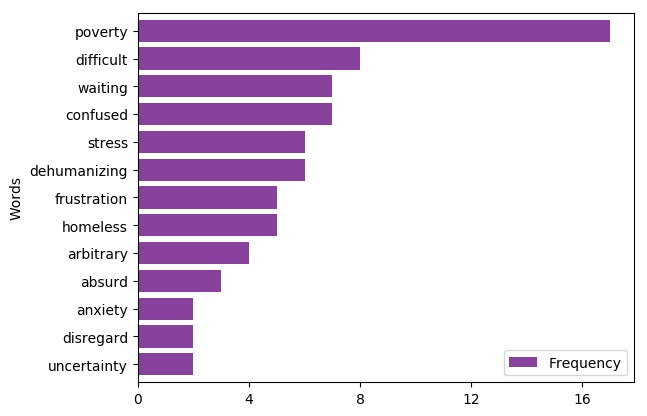

In [412]:
ax = negative_words.plot(y='Frequency', x='Words', kind='barh', width=0.8, color='#88419d')
ax.set_xticks([0, 4, 8, 12, 16])
plt.savefig("negative_words.pdf")
plt.show()

# Getting info on bails

In [362]:
bails = {'original_amount': [200000, 15000, 10000, 25000, 'NaN', 'NaN','NaN', 'NaN', 'NaN', 10000, 10000, 'NaN', 'NaN', 'NaN', 2500, 1500, 2500, 20000, 4000, 0, 30000, 100000, 15000, 5000, 15000, 500000, 7500, 20000, 5000, 75000, 25000, 25000, 15000, 10000, 7500, 10000, 7500, 7500, 2500, 15000, 7500, 10000, 10000, 3000, 5000, 35000, 30000, 15000, 10000, 7500, 1500, 15000, 1500, 20000, 'NaN',2500, 1500, 7500], 'set_amount': [75000, 5000, 5000, 3000, 30000, 10000, 30000, 15000, 10000, 10000, 10000, 6000, 6000, 15000, 5000, 1000, 2500, 3000, 3000, 5000, 30000, 6000, 0, 5000, 'NaN', 250000, 0, 7500, 0, 30000, 5000, 2000, 0, 0, 0, 5000, 3000, 3000, 0, 2500, 2500, 4500, 2500, 0, 0, 5000, 1500, 3000, 2500, 2500, 1500, 7500, 0, 10000, 5000, 0, 0, 0], 'crime': ['NaN', 'NaN', 'NaN', 'NaN', 'petit larceny', 'stolen property', 'possession of a controled substance', 'assault in domestic dispute', 'stealing iphone', 'assault', 'marihuana possession', 'shooting', 'illegal weapon', 'bicycle incident', 'illegal weapon', 'assault', 'assault', 'stealing icecream', 'arrested upon release', 'NaN', 'NaN', 'shooting', 'possession of cocaine', 'stealing and resisting arrest', 'stealing', 'possession of cocaine', 'drug charges', 'drug charges', 'DUI', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'drug possession and speeding', 'NaN','NaN','NaN','NaN','drug sale and possession', 'NaN','NaN','drug sale', 'collision into traffic light', 'drug possession', 'grand larceny', 'prostitution', 'NaN','NaN','stealing phone', 'DUI', 'altercation']}


In [363]:
df = pd.DataFrame(data=bails)
df


,original_amount,set_amount,crime
0,200000,75000,NaN
1,15000,5000,NaN
2,10000,5000,NaN
3,25000,3000,NaN
4,NaN,30000,petit larceny
5,NaN,10000,stolen property
6,NaN,30000,possession of a controled substance
7,NaN,15000,assault in domestic dispute
8,NaN,10000,stealing iphone
9,10000,10000,assault


In [364]:
import numpy as np
df.replace('NaN',np.nan)

,original_amount,set_amount,crime
0,200000.0,75000.0,NaN
1,15000.0,5000.0,NaN
2,10000.0,5000.0,NaN
3,25000.0,3000.0,NaN
4,NaN,30000.0,petit larceny
5,NaN,10000.0,stolen property
6,NaN,30000.0,possession of a controled substance
7,NaN,15000.0,assault in domestic dispute
8,NaN,10000.0,stealing iphone
9,10000.0,10000.0,assault


In [365]:
df.describe()

,original_amount,set_amount,crime
count,58,58,58
unique,18,16,27
top,NaN,0,NaN
freq,9,13,25


In [366]:
df.dtypes

original_amount    object
set_amount         object
crime              object
dtype: object

In [367]:
df["original_amount"]=df["original_amount"].astype('float')
df

,original_amount,set_amount,crime
0,200000.0,75000,NaN
1,15000.0,5000,NaN
2,10000.0,5000,NaN
3,25000.0,3000,NaN
4,NaN,30000,petit larceny
5,NaN,10000,stolen property
6,NaN,30000,possession of a controled substance
7,NaN,15000,assault in domestic dispute
8,NaN,10000,stealing iphone
9,10000.0,10000,assault


In [369]:
df.dtypes

original_amount    float64
set_amount          object
crime               object
dtype: object

In [370]:
df["original_amount"].mean()

28173.469387755104

In [371]:
df["set_amount"]=df["set_amount"].astype('float')


In [372]:
df["set_amount"].mean()

11342.105263157895

In [373]:
df.plot(kind='line')

In [376]:
df_bails = df.dropna() 

In [379]:
df_bails.sort_values('original_amount', ascending=False)

,original_amount,set_amount,crime
25,500000.0,250000.0,possession of cocaine
0,200000.0,75000.0,NaN
21,100000.0,6000.0,shooting
29,75000.0,30000.0,NaN
45,35000.0,5000.0,drug sale and possession
20,30000.0,30000.0,NaN
46,30000.0,1500.0,NaN
30,25000.0,5000.0,NaN
31,25000.0,2000.0,NaN
3,25000.0,3000.0,NaN


In [386]:
assault = df_bails[df_bails['crime'].str.contains('assault')]
assault

,original_amount,set_amount,crime
9,10000.0,10000.0,assault
15,1500.0,1000.0,assault
16,2500.0,2500.0,assault


In [388]:
drugs = df_bails[df_bails['crime'].str.contains('possession|drug')]
drugs

,original_amount,set_amount,crime
10,10000.0,10000.0,marihuana possession
22,15000.0,0.0,possession of cocaine
25,500000.0,250000.0,possession of cocaine
26,7500.0,0.0,drug charges
27,20000.0,7500.0,drug charges
40,7500.0,2500.0,drug possession and speeding
45,35000.0,5000.0,drug sale and possession
48,10000.0,2500.0,drug sale
50,1500.0,1500.0,drug possession


In [389]:
burglary= df_bails[df_bails['crime'].str.contains('steal')]
burglary

,original_amount,set_amount,crime
17,20000.0,3000.0,stealing icecream
23,5000.0,5000.0,stealing and resisting arrest
55,2500.0,0.0,stealing phone


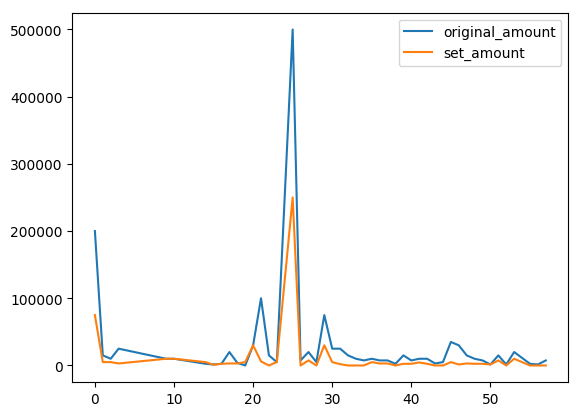

In [411]:
ax = df_bails.plot(kind='line')
plt.savefig("all_bails.pdf")
plt.show()